<a href="https://colab.research.google.com/github/sgevatschnaider/machine-learning/blob/main/notebooks/es/Bagging_Boostrap_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importaci√≥n de librer√≠as necesarias para mostrar HTML en Google Colab
from IPython.display import display, HTML

# --- PLANTILLA HTML COMPLETA PARA ENSEMBLES ---
html_ensembles = """
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Ensembles en Machine Learning: Fundamentos</title>

  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;500;600;700&family=JetBrains+Mono:wght@400;500&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">

  <script>
    window.MathJax = {
      tex: {
        inlineMath: [['$', '$'], ['\\\\(', '\\\\)']],
        displayMath: [['$$', '$$'], ['\\\\[', '\\\\]']],
        packages: {'[+]': ['ams']}
      },
      svg: { fontCache: 'global' }
    };
  </script>
  <script src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.2.2/es5/tex-mml-chtml.min.js" async></script>

  <style>
    :root {
      --primary-gradient: linear-gradient(135deg, #89f7fe 0%, #66a6ff 100%);
      --success-gradient: linear-gradient(135deg, #89f7fe 0%, #66a6ff 100%);
      --bg-primary: linear-gradient(135deg, #f5f7fa 0%, #c3cfe2 100%);
      --bg-card: rgba(255, 255, 255, 0.95);
      --bg-content: rgba(248, 250, 252, 0.9);
      --text-primary: #2d3748;
      --text-secondary: #4a5568;
      --text-muted: #718096;
      --accent-primary: #66a6ff;
      --border-color: rgba(0, 0, 0, 0.08);
      --shadow-md: 0 4px 12px rgba(0, 0, 0, 0.1);
      --shadow-lg: 0 10px 25px rgba(0, 0, 0, 0.15);
      --radius-lg: 16px;
      --transition-normal: all 0.3s cubic-bezier(0.4, 0, 0.2, 1);
    }
    [data-theme="dark"] {
      --bg-primary: linear-gradient(135deg, #1a202c 0%, #2d3748 50%, #4a5568 100%);
      --bg-card: rgba(45, 55, 72, 0.95);
      --bg-content: rgba(26, 32, 44, 0.9);
      --text-primary: #f7fafc;
      --text-secondary: #e2e8f0;
      --text-muted: #a0aec0;
      --border-color: rgba(255, 255, 255, 0.1);
    }
    * { margin: 0; padding: 0; box-sizing: border-box; }
    html { scroll-behavior: smooth; }
    body { font-family: 'Inter', sans-serif; background: var(--bg-primary); color: var(--text-primary); line-height: 1.6; transition: var(--transition-normal); min-height: 100vh; position: relative; overflow-x: hidden; padding: 1rem; }
    .particles-canvas { position: fixed; top: 0; left: 0; width: 100%; height: 100%; pointer-events: none; z-index: -1; opacity: 0.6; }
    .theme-toggle { position: fixed; top: 2rem; right: 2rem; width: 56px; height: 56px; border-radius: 50%; background: var(--bg-card); backdrop-filter: blur(20px); border: 1px solid var(--border-color); box-shadow: var(--shadow-lg); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.25rem; color: var(--accent-primary); transition: var(--transition-normal); z-index: 1000; }
    .theme-toggle:hover { transform: scale(1.1) rotate(180deg); }
    .main-container { max-width: 900px; margin: 0 auto; padding: 2rem 0; }
    .main-title { text-align: center; font-size: clamp(2rem, 5vw, 3rem); font-weight: 700; margin-bottom: 3rem; background: var(--primary-gradient); -webkit-background-clip: text; -webkit-text-fill-color: transparent; position: relative; }
    .main-title::after { content: ''; position: absolute; bottom: -10px; left: 50%; transform: translateX(-50%); width: 60px; height: 4px; background: var(--accent-primary); border-radius: 2px; }
    .accordion-container { display: flex; flex-direction: column; gap: 1.5rem; }
    .topic-card { background: var(--bg-card); backdrop-filter: blur(20px); border-radius: var(--radius-lg); border: 1px solid var(--border-color); box-shadow: var(--shadow-md); overflow: hidden; transition: var(--transition-normal); position: relative; animation: fadeInUp 0.6s ease-out; animation-fill-mode: both; }
    .topic-card:nth-child(1) { animation-delay: 0.1s; } .topic-card:nth-child(2) { animation-delay: 0.2s; } .topic-card:nth-child(3) { animation-delay: 0.3s; } .topic-card:nth-child(4) { animation-delay: 0.4s; } .topic-card:nth-child(5) { animation-delay: 0.5s; } .topic-card:nth-child(6) { animation-delay: 0.6s; }
    .topic-card::before { content: ''; position: absolute; top: 0; left: 0; right: 0; height: 3px; background: var(--primary-gradient); transform: scaleX(0); transition: var(--transition-normal); }
    .topic-card:hover { transform: translateY(-2px); box-shadow: var(--shadow-lg); }
    .topic-card.active::before { transform: scaleX(1); }
    .topic-header { cursor: pointer; padding: 1.5rem 2rem; display: flex; justify-content: space-between; align-items: center; }
    .topic-title { font-size: 1.25rem; font-weight: 600; color: var(--text-primary); }
    .expand-icon { font-size: 1.125rem; color: var(--text-muted); transition: var(--transition-normal); }
    .topic-card.active .expand-icon { transform: rotate(180deg); color: var(--accent-primary); }
    .topic-content { max-height: 0; overflow: hidden; transition: max-height 0.8s cubic-bezier(0.4, 0, 0.2, 1), padding 0.8s cubic-bezier(0.4, 0, 0.2, 1); background: var(--bg-content); border-top: 1px solid transparent; }
    .topic-card.active .topic-content { max-height: 2000px; padding: 2rem; border-top-color: var(--border-color); }
    .topic-content h4 { font-size: 1.125rem; font-weight: 600; margin-bottom: 1rem; }
    .topic-content p, .topic-content li { line-height: 1.7; color: var(--text-secondary); margin-bottom: 1rem; }
    .topic-content strong { color: var(--text-primary); font-weight: 600; }
    .topic-content blockquote { border-left: 4px solid var(--accent-primary); margin: 1.5rem 0; padding: 1.25rem 1.5rem; background: rgba(102, 166, 255, 0.08); border-radius: 0 12px 12px 0; font-style: italic; color: var(--text-secondary); }
    .table-container { overflow-x: auto; margin: 1.5rem 0; border-radius: 12px; border: 1px solid var(--border-color); }
    .topic-content table { width: 100%; border-collapse: collapse; }
    .topic-content th, .topic-content td { padding: 1rem; text-align: left; border-bottom: 1px solid var(--border-color); }
    .topic-content th { background: rgba(102, 166, 255, 0.1); font-weight: 600; }
    .footer { text-align: center; margin-top: 4rem; padding: 2rem 0; border-top: 1px solid var(--border-color); color: var(--text-muted); font-size: 0.875rem; }
    @keyframes fadeInUp { from { opacity: 0; transform: translateY(30px); } to { opacity: 1; transform: translateY(0); } }
  </style>
</head>

<body data-theme="dark">
  <canvas class="particles-canvas" id="particlesCanvas"></canvas>
  <div class="theme-toggle" id="themeToggle" role="button" aria-label="Cambiar tema"><i class="fas fa-moon" id="themeIcon"></i></div>

  <div class="main-container">
    <h1 class="main-title">Ensembles en Machine Learning</h1>

    <div class="accordion-container">
      <!-- 1. Introducci√≥n -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">¬øQu√© es un Modelo de Ensamble?</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <p>Un ensamble es una t√©cnica de aprendizaje autom√°tico que combina <strong>m√∫ltiples modelos individuales</strong> (denominados modelos base o clasificadores d√©biles) para producir una predicci√≥n agregada, que normalmente supera el rendimiento de cualquier modelo individual.</p>
          <h4>Motivaci√≥n: ¬øPor qu√© usar ensambles?</h4>
          <ul>
              <li>Los modelos individuales tienden a cometer errores diferentes.</li>
              <li>Si se combinan correctamente, estos errores pueden compensarse mutuamente.</li>
              <li>La predicci√≥n combinada puede tener menor error total, gracias a la reducci√≥n de varianza o sesgo (seg√∫n el tipo de ensamble).</li>
          </ul>
        </div>
      </div>

      <!-- 2. Explicaci√≥n de la Imagen -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Explicaci√≥n del Proceso de Ensamble</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
            <p>El proceso esquem√°tico de un ensamble por votaci√≥n (com√∫n en clasificaci√≥n) es el siguiente:</p>
            <ol>
                <li><strong>Training Set:</strong> Se parte de un mismo conjunto de datos para entrenar m√∫ltiples modelos.</li>
                <li><strong>Clasificadores $C_1, C_2, \\dots, C_m$:</strong> Se entrenan varios modelos de clasificaci√≥n de forma independiente.</li>
                <li><strong>Predicciones Individuales $P_1, P_2, \\dots, P_m$:</strong> Cada modelo hace su predicci√≥n individual.</li>
                <li><strong>Mecanismo de Votaci√≥n:</strong> Las predicciones se combinan mediante votaci√≥n mayoritaria.</li>
                <li><strong>Resultado Final $P_f$:</strong> La predicci√≥n final del ensamble es la clase que recibe m√°s votos.</li>
            </ol>
        </div>
      </div>

      <!-- 3. Importancia de la Diversidad -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Importancia de la Diversidad entre Modelos</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
            <p>Un punto crucial es que la <strong>diversidad</strong> entre modelos es esencial. Si todos los modelos son muy parecidos entre s√≠ (correlacionados), no aportan informaci√≥n nueva, y el ensamble no mejora el rendimiento significativamente.</p>
            <h4>Factores que Inducen Diversidad:</h4>
            <ul>
                <li><strong>Diferencia en los Datos:</strong> Entrenar modelos sobre subconjuntos distintos (ej. bootstrap en Bagging).</li>
                <li><strong>Algoritmos Diferentes:</strong> Usar √°rboles, SVM, redes neuronales, etc., en el mismo ensamble.</li>
                <li><strong>Hip√≥tesis Diferente:</strong> Variar los hiperpar√°metros de cada modelo (profundidad, regularizaci√≥n, etc.).</li>
            </ul>
        </div>
      </div>

      <!-- 4. Riesgo de Falta de Diversidad -->
       <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Riesgo: Falta de Diversidad</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
           <p>Cuando los modelos del ensamble usan la misma estructura, se entrenan con datos id√©nticos y tienen hip√≥tesis similares, tienden a cometer los mismos errores. En este caso, la agregaci√≥n no logra reducir el error general.</p>
        </div>
      </div>

      <!-- 5. Tipos Comunes -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Tipos Comunes de Ensambles</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <div class="table-container">
            <table>
              <thead><tr><th>Tipo de Ensamble</th><th>Principio Clave</th><th>¬øAporta Diversidad?</th></tr></thead>
              <tbody>
                <tr><td><strong>Bagging</strong></td><td>Bootstrap + promedio/voto</td><td>S√≠, a trav√©s de muestras distintas.</td></tr>
                <tr><td><strong>Random Forest</strong></td><td>Bagging + selecci√≥n aleatoria de atributos</td><td>S√≠, por muestras y variables distintas.</td></tr>
                <tr><td><strong>Boosting</strong></td><td>Modelos secuenciales que corrigen errores previos</td><td>No, el enfoque es la correcci√≥n, no la diversidad.</td></tr>
                <tr><td><strong>Stacking</strong></td><td>Combina predicciones de modelos base con otro</td><td>S√≠, al usar modelos base diferentes.</td></tr>
                <tr><td><strong>Voting Classifier</strong></td><td>Voto entre modelos diversos</td><td>S√≠, si se usan modelos variados.</td></tr>
              </tbody>
            </table>
        </div>
      </div>

      <!-- 6. Conclusi√≥n -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Conclusi√≥n General</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <p>Los ensambles son una forma de aprovechar la colaboraci√≥n entre m√∫ltiples modelos para mejorar la precisi√≥n, reducir la varianza o incluso corregir sesgos. Sin embargo, su efectividad depende cr√≠ticamente de la <strong>diversidad</strong> entre los modelos participantes. Esta diversidad puede lograrse mediante datos, algoritmos o estructuras distintas.</p>
          <blockquote>La idea central es que al combinar m√∫ltiples modelos no correlacionados, sus errores aleatorios se cancelan, resultando en una predicci√≥n final m√°s robusta y precisa.</blockquote>
        </div>
      </div>
    </div>
    <div class="footer"><p>Elaborado por profesor Sergio Gevatschnaider</p></div>
  </div>

  <script>
    (function() {
      const themeToggle = document.getElementById('themeToggle');
      const themeIcon = document.getElementById('themeIcon');
      const bodyEl = document.body;
      function setTheme(theme) {
        bodyEl.setAttribute('data-theme', theme);
        localStorage.setItem('theme', theme);
        if (themeIcon) { themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon'; }
      }
      themeToggle.addEventListener('click', () => { setTheme(bodyEl.getAttribute('data-theme') === 'dark' ? 'light' : 'dark'); });
      setTheme(localStorage.getItem('theme') || 'dark');

      document.querySelectorAll('.topic-header').forEach(header => {
        header.addEventListener('click', () => {
          const card = header.parentElement;
          if (!card.classList.contains('active')) {
            card.classList.add('active');
            if (window.MathJax) {
              MathJax.typesetPromise([card.querySelector('.topic-content')]).catch(err => console.error('MathJax error:', err));
            }
          } else {
            card.classList.remove('active');
          }
        });
      });

      const canvas = document.getElementById('particlesCanvas');
      if (canvas) {
        const ctx = canvas.getContext('2d');
        let particles = [];
        const particleCount = 50;
        function setCanvasSize() { canvas.width = window.innerWidth; canvas.height = window.innerHeight; }
        class Particle {
          constructor() { this.x = Math.random() * canvas.width; this.y = Math.random() * canvas.height; this.size = Math.random() * 2 + 1; this.speedX = Math.random() * 1 - 0.5; this.speedY = Math.random() * 1 - 0.5; }
          update() { if (this.x > canvas.width || this.x < 0) this.speedX = -this.speedX; if (this.y > canvas.height || this.y < 0) this.speedY = -this.speedY; this.x += this.speedX; this.y += this.speedY; }
          draw(theme) { ctx.fillStyle = theme === 'dark' ? 'rgba(255, 255, 255, 0.5)' : 'rgba(0, 0, 0, 0.5)'; ctx.beginPath(); ctx.arc(this.x, this.y, this.size, 0, Math.PI * 2); ctx.fill(); }
        }
        function initParticles() { particles = []; for (let i = 0; i < particleCount; i++) { particles.push(new Particle()); } }
        function animateParticles() { const theme = document.body.getAttribute('data-theme'); ctx.clearRect(0, 0, canvas.width, canvas.height); particles.forEach(p => { p.update(); p.draw(theme); }); requestAnimationFrame(animateParticles); }
        window.addEventListener('resize', () => { setCanvasSize(); initParticles(); });
        setCanvasSize(); initParticles(); animateParticles();
      }

      const firstCard = document.querySelector('.topic-card');
      if (firstCard) {
        firstCard.classList.add('active');
        if (window.MathJax) {
          setTimeout(() => MathJax.typesetPromise([firstCard.querySelector('.topic-content')]), 100);
        }
      }
    })();
  </script>
</body>
</html>
"""

# Renderizar el HTML final en la salida de la celda de Google Colab
display(HTML(html_ensembles))

In [ ]:
# Importaci√≥n de librer√≠as necesarias para mostrar HTML en Google Colab
from IPython.display import display, HTML

# --- PLANTILLA HTML COMPLETA Y CORREGIDA ---
html_bagging_final = """
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>An√°lisis de Bagging (Bootstrap Aggregating)</title>

  <!-- Fuentes y Iconos -->
  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;500;600;700&family=JetBrains+Mono:wght@400;500&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">

  <!-- MathJax Configuration -->
  <script>
    window.MathJax = {
      tex: {
        inlineMath: [['$', '$'], ['\\\\(', '\\\\)']],
        displayMath: [['$$', '$$'], ['\\\\[', '\\\\]']],
        processEscapes: true,
        processEnvironments: true,
        packages: {'[+]': ['ams', 'newcommand', 'configmacros']}
      },
      svg: {
        fontCache: 'global',
        displayAlign: 'center',
        displayIndent: '0em'
      },
      startup: {
        ready: () => {
          MathJax.startup.defaultReady();
        }
      }
    };
  </script>
  <script src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.2.2/es5/tex-mml-chtml.min.js" async></script>

  <style>
    /* --- VARIABLES CSS PERSONALIZADAS --- */
    :root {
      --primary-gradient: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
      --secondary-gradient: linear-gradient(135deg, #f093fb 0%, #f5576c 100%);
      --success-gradient: linear-gradient(135deg, #4facfe 0%, #00f2fe 100%);
      --bg-primary: linear-gradient(135deg, #f5f7fa 0%, #c3cfe2 100%);
      --bg-card: rgba(255, 255, 255, 0.95);
      --bg-content: rgba(248, 250, 252, 0.9);
      --text-primary: #2d3748;
      --text-secondary: #4a5568;
      --text-muted: #718096;
      --accent-primary: #4facfe;
      --accent-secondary: #00f2fe;
      --border-color: rgba(0, 0, 0, 0.08);
      --shadow-sm: 0 2px 4px rgba(0, 0, 0, 0.05);
      --shadow-md: 0 4px 12px rgba(0, 0, 0, 0.1);
      --shadow-lg: 0 10px 25px rgba(0, 0, 0, 0.15);
      --radius-md: 12px;
      --radius-lg: 16px;
      --transition-normal: all 0.3s cubic-bezier(0.4, 0, 0.2, 1);
    }
    [data-theme="dark"] {
      --bg-primary: linear-gradient(135deg, #1a202c 0%, #2d3748 50%, #4a5568 100%);
      --bg-card: rgba(45, 55, 72, 0.95);
      --bg-content: rgba(26, 32, 44, 0.9);
      --text-primary: #f7fafc;
      --text-secondary: #e2e8f0;
      --text-muted: #a0aec0;
      --border-color: rgba(255, 255, 255, 0.1);
    }
    * { margin: 0; padding: 0; box-sizing: border-box; }
    html { scroll-behavior: smooth; font-size: 16px; }
    body { font-family: 'Inter', sans-serif; background: var(--bg-primary); color: var(--text-primary); line-height: 1.6; transition: var(--transition-normal); min-height: 100vh; position: relative; overflow-x: hidden; padding: 1rem; }
    .particles-canvas { position: fixed; top: 0; left: 0; width: 100%; height: 100%; pointer-events: none; z-index: -1; opacity: 0.6; }
    .theme-toggle { position: fixed; top: 2rem; right: 2rem; width: 56px; height: 56px; border-radius: 50%; background: var(--bg-card); backdrop-filter: blur(20px); border: 1px solid var(--border-color); box-shadow: var(--shadow-lg); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.25rem; color: var(--accent-primary); transition: var(--transition-normal); z-index: 1000; user-select: none; }
    .theme-toggle:hover { transform: scale(1.1) rotate(180deg); }
    .main-container { max-width: 900px; margin: 0 auto; padding: 2rem 0; }
    .main-title { text-align: center; font-size: clamp(2rem, 5vw, 3rem); font-weight: 700; margin-bottom: 3rem; background: var(--primary-gradient); -webkit-background-clip: text; -webkit-text-fill-color: transparent; position: relative; }
    .main-title::after { content: ''; position: absolute; bottom: -10px; left: 50%; transform: translateX(-50%); width: 60px; height: 4px; background: var(--accent-primary); border-radius: 2px; }
    .accordion-container { display: flex; flex-direction: column; gap: 1.5rem; }
    .topic-card { background: var(--bg-card); backdrop-filter: blur(20px); border-radius: var(--radius-lg); border: 1px solid var(--border-color); box-shadow: var(--shadow-md); overflow: hidden; transition: var(--transition-normal); position: relative; animation: fadeInUp 0.6s ease-out; animation-fill-mode: both; }
    .topic-card:nth-child(1) { animation-delay: 0.1s; } .topic-card:nth-child(2) { animation-delay: 0.2s; } .topic-card:nth-child(3) { animation-delay: 0.3s; } .topic-card:nth-child(4) { animation-delay: 0.4s; } .topic-card:nth-child(5) { animation-delay: 0.5s; } .topic-card:nth-child(6) { animation-delay: 0.6s; } .topic-card:nth-child(7) { animation-delay: 0.7s; }
    .topic-card::before { content: ''; position: absolute; top: 0; left: 0; right: 0; height: 3px; background: var(--primary-gradient); transform: scaleX(0); transition: var(--transition-normal); }
    .topic-card:hover { transform: translateY(-2px); box-shadow: var(--shadow-lg); }
    .topic-card.active::before { transform: scaleX(1); }
    .topic-header { cursor: pointer; padding: 1.5rem 2rem; display: flex; justify-content: space-between; align-items: center; user-select: none; }
    .topic-title { font-size: 1.25rem; font-weight: 600; color: var(--text-primary); display: flex; align-items: center; gap: 0.75rem; }
    .topic-icon { width: 32px; height: 32px; border-radius: 50%; background: var(--success-gradient); display: flex; align-items: center; justify-content: center; color: white; font-size: 0.875rem; }
    .expand-icon { font-size: 1.125rem; color: var(--text-muted); transition: var(--transition-normal); }
    .topic-card.active .expand-icon { transform: rotate(180deg); color: var(--accent-primary); }
    .topic-content { max-height: 0; overflow: hidden; transition: max-height 0.6s cubic-bezier(0.4, 0, 0.2, 1), padding 0.6s cubic-bezier(0.4, 0, 0.2, 1); background: var(--bg-content); border-top: 1px solid transparent; }
    .topic-card.active .topic-content { max-height: 2000px; padding: 2rem; border-top-color: var(--border-color); }
    .topic-content h4 { font-size: 1.125rem; font-weight: 600; color: var(--text-primary); margin-bottom: 1rem; display: flex; align-items: center; gap: 0.5rem; }
    .topic-content h4::before { content: ''; width: 4px; height: 20px; background: var(--accent-primary); border-radius: 2px; }
    .topic-content p, .topic-content li { line-height: 1.7; color: var(--text-secondary); margin-bottom: 1rem; font-size: 1rem; }
    .topic-content strong { color: var(--text-primary); font-weight: 600; }
    .topic-content ul { padding-left: 1.5rem; margin-bottom: 1rem; }
    .topic-content li { margin-bottom: 0.5rem; }
    .steps-container { display: flex; flex-direction: column; gap: 1.5rem; }
    .step { display: flex; align-items: flex-start; gap: 1rem; padding: 1.5rem; background: rgba(79, 172, 254, 0.05); border-radius: var(--radius-md); border: 1px solid rgba(79, 172, 254, 0.1); transition: var(--transition-normal); position: relative; overflow: hidden; }
    .step::before { content: ''; position: absolute; top: 0; left: 0; width: 4px; height: 100%; background: var(--success-gradient); }
    .step:hover { transform: translateX(4px); box-shadow: var(--shadow-md); }
    .step-number { flex-shrink: 0; width: 48px; height: 48px; background: var(--success-gradient); color: white; border-radius: 50%; display: flex; align-items: center; justify-content: center; font-weight: 700; font-size: 1.25rem; box-shadow: var(--shadow-sm); }
    .step-description p { margin-bottom: 0.5rem; color: var(--text-secondary); }
    .formula-block { padding: 1.5rem; background: rgba(0, 0, 0, 0.03); border: 1px solid var(--border-color); border-radius: var(--radius-md); text-align: center; margin: 1.5rem 0; overflow-x: auto; font-family: 'JetBrains Mono', monospace; position: relative; }
    [data-theme="dark"] .formula-block { background: rgba(255, 255, 255, 0.05); }
    .topic-content blockquote { border-left: 4px solid var(--accent-primary); margin: 1.5rem 0; padding: 1.25rem 1.5rem; background: rgba(79, 172, 254, 0.08); border-radius: 0 var(--radius-md) var(--radius-md) 0; font-style: italic; position: relative; color: var(--text-secondary); }
    .table-container { overflow-x: auto; margin: 1.5rem 0; border-radius: var(--radius-md); border: 1px solid var(--border-color); }
    .topic-content table { width: 100%; border-collapse: collapse; font-size: 0.9rem; }
    .topic-content th, .topic-content td { padding: 1rem; text-align: left; border-bottom: 1px solid var(--border-color); }
    .topic-content th { background: rgba(79, 172, 254, 0.1); font-weight: 600; color: var(--text-primary); text-transform: uppercase; letter-spacing: 0.05em; }
    .topic-content tr:hover { background: rgba(79, 172, 254, 0.05); }
    .footer { text-align: center; margin-top: 4rem; padding: 2rem 0; border-top: 1px solid var(--border-color); color: var(--text-muted); font-size: 0.875rem; }
    @keyframes fadeInUp { from { opacity: 0; transform: translateY(30px); } to { opacity: 1; transform: translateY(0); } }
    @media (max-width: 768px) { .main-container { padding: 1rem; } .topic-header { padding: 1.25rem 1.5rem; } .topic-card.active .topic-content { padding: 1.5rem; } .theme-toggle { top: 1rem; right: 1rem; width: 48px; height: 48px; } }
  </style>
</head>

<body data-theme="dark">
  <canvas class="particles-canvas" id="particlesCanvas"></canvas>
  <div class="theme-toggle" id="themeToggle" role="button" aria-label="Cambiar tema">
    <i class="fas fa-moon" id="themeIcon"></i>
  </div>

  <div class="main-container">
    <h1 class="main-title">Bagging: Bootstrap Aggregating</h1>

    <div class="accordion-container">
      <!-- Tarjeta 1: Fundamento Estad√≠stico -->
      <div class="topic-card" data-topic="fundamento">
        <div class="topic-header">
          <span class="topic-title"><div class="topic-icon"><i class="fas fa-calculator"></i></div>Fundamento Estad√≠stico</span>
          <i class="fas fa-chevron-down expand-icon"></i>
        </div>
        <div class="topic-content">
          <h4>Bootstrap Sampling</h4>
          <p>El bootstrap es una t√©cnica de remuestreo que crea nuevas muestras a partir de una original, <strong>con reemplazo</strong> y de igual tama√±o. Este proceso genera diversidad entre los modelos entrenados.</p>
          <h4>Agregaci√≥n (Aggregating)</h4>
          <p>Se combinan las predicciones de los modelos. Para <strong>regresi√≥n</strong>, se promedia la salida:</p>
          <div class="formula-block">$$\\hat{f}(x) = \\frac{1}{B} \\sum_{b=1}^{B} f^{(b)}(x)$$</div>
          <p>Para <strong>clasificaci√≥n</strong>, se usa el voto por mayor√≠a:</p>
          <div class="formula-block">$$\\hat{y}(x) = \\text{modo}\\{f^{(1)}(x), f^{(2)}(x), \\ldots, f^{(B)}(x)\\}$$</div>
        </div>
      </div>

      <!-- Tarjeta 2: Funcionamiento Interno -->
      <div class="topic-card" data-topic="funcionamiento">
        <div class="topic-header">
          <span class="topic-title"><div class="topic-icon"><i class="fas fa-cogs"></i></div>Funcionamiento Paso a Paso</span>
          <i class="fas fa-chevron-down expand-icon"></i>
        </div>
        <div class="topic-content">
          <div class="steps-container">
            <div class="step"><div class="step-number">1</div><div class="step-description"><h4>Dataset Original</h4><p>Se parte de un conjunto de entrenamiento $D = \\{(x_i, y_i)\\}_{i=1}^n$.</p></div></div>
            <div class="step"><div class="step-number">2</div><div class="step-description"><h4>Muestreo Bootstrap</h4><p>Se generan $B$ subconjuntos $D^{(1)}, \\ldots, D^{(B)}$ mediante muestreo con reemplazo desde $D$.</p></div></div>
            <div class="step"><div class="step-number">3</div><div class="step-description"><h4>Entrenamiento</h4><p>Se entrena un modelo $f^{(b)}$ independiente en cada subconjunto $D^{(b)}$.</p></div></div>
            <div class="step"><div class="step-number">4</div><div class="step-description"><h4>Agregaci√≥n</h4><p>Para una nueva entrada $x$, se obtienen las predicciones $f^{(1)}(x), \\ldots, f^{(B)}(x)$.</p></div></div>
            <div class="step"><div class="step-number">5</div><div class="step-description"><h4>Predicci√≥n Final</h4><p>El resultado agregado (promedio o voto) es la predicci√≥n final del ensamble.</p></div></div>
          </div>
        </div>
      </div>

      <!-- Tarjeta 3: Propiedades y Beneficios -->
      <div class="topic-card" data-topic="propiedades">
        <div class="topic-header"><span class="topic-title"><div class="topic-icon"><i class="fas fa-star"></i></div>Propiedades y Beneficios</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <h4>üîπ Reducci√≥n de Varianza</h4><p>Es el principal beneficio. La agregaci√≥n promedia los errores no sistem√°ticos, reduciendo la varianza del modelo final.</p>
          <h4>üîπ Estabilidad</h4><p>Hace que modelos inestables (como √°rboles profundos) se vuelvan m√°s robustos.</p>
          <h4>üîπ Paralelizaci√≥n</h4><p>Los modelos se pueden entrenar simult√°neamente, acelerando el proceso.</p>
        </div>
      </div>

      <!-- Tarjeta 4: Aplicaciones Comunes -->
      <div class="topic-card" data-topic="aplicaciones">
        <div class="topic-header"><span class="topic-title"><div class="topic-icon"><i class="fas fa-tree"></i></div>Aplicaciones Comunes</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <p><strong>√Årboles de decisi√≥n:</strong> El modelo base m√°s com√∫n debido a su alta varianza.</p>
          <blockquote>El caso m√°s emblem√°tico es <strong>Random Forest</strong>, que a√±ade m√°s aleatoriedad al proceso.</blockquote>
        </div>
      </div>

      <!-- Tarjeta 5: Comparaci√≥n con Boosting -->
      <div class="topic-card" data-topic="comparacion">
        <div class="topic-header"><span class="topic-title"><div class="topic-icon"><i class="fas fa-balance-scale"></i></div>Comparaci√≥n con Boosting</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <div class="table-container">
            <table>
              <thead><tr><th>Aspecto</th><th>Bagging</th><th>Boosting</th></tr></thead>
              <tbody>
                <tr><td><strong>Combinaci√≥n</strong></td><td>Promedio / Voto uniforme</td><td>Suma ponderada adaptativa</td></tr>
                <tr><td><strong>Objetivo</strong></td><td>Reducir varianza</td><td>Reducir sesgo</td></tr>
                <tr><td><strong>Entrenamiento</strong></td><td>Paralelo, independiente</td><td>Secuencial, dependiente</td></tr>
                <tr><td><strong>Riesgo de overfit</strong></td><td>Menor</td><td>Mayor (si no se controla)</td></tr>
              </tbody>
            </table>
          </div>
        </div>
      </div>

      <!-- Tarjeta 6: Limitaciones -->
      <div class="topic-card" data-topic="limitaciones">
        <div class="topic-header"><span class="topic-title"><div class="topic-icon"><i class="fas fa-exclamation-triangle"></i></div>Limitaciones</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <ul>
            <li><strong>No mejora el sesgo:</strong> Si el modelo base es muy sesgado, Bagging no lo corregir√°.</li>
            <li><strong>Beneficio en modelos inestables:</strong> Aporta poco a modelos ya estables (ej. k-NN).</li>
            <li><strong>Costo computacional:</strong> Requiere entrenar B modelos, aunque es paralelizable.</li>
          </ul>
        </div>
      </div>

      <!-- Tarjeta 7: Conclusi√≥n -->
      <div class="topic-card" data-topic="conclusion">
        <div class="topic-header"><span class="topic-title"><div class="topic-icon"><i class="fas fa-check-circle"></i></div>Conclusi√≥n y Concepto Clave</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <h4>Conclusi√≥n</h4>
          <p>Bagging es una t√©cnica de ensamble elegante y potente que reduce la varianza para crear modelos m√°s robustos y confiables, siendo la base de algoritmos tan importantes como Random Forest.</p>
          <h4>Concepto Clave</h4>
          <blockquote>Bagging mejora la generalizaci√≥n al reducir la varianza mediante la combinaci√≥n de modelos entrenados sobre subconjuntos bootstrap del dataset original.</blockquote>
        </div>
      </div>
    </div>
    <div class="footer"><p>Elaborado por <span class="author">profesor Sergio Gevatschnaider</span></p></div>
  </div>

  <script>
    (function() {
      // --- THEME TOGGLE ---
      const themeToggle = document.getElementById('themeToggle');
      const themeIcon = document.getElementById('themeIcon');
      const bodyEl = document.body;
      function setTheme(theme) {
        bodyEl.setAttribute('data-theme', theme);
        localStorage.setItem('theme', theme);
        if (themeIcon) {
          themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon';
        }
      }
      themeToggle.addEventListener('click', () => {
        const newTheme = bodyEl.getAttribute('data-theme') === 'dark' ? 'light' : 'dark';
        setTheme(newTheme);
      });
      setTheme(localStorage.getItem('theme') || 'dark');

      // --- ACCORDION LOGIC WITH MATHJAX FIX ---
      document.querySelectorAll('.topic-header').forEach(header => {
        header.addEventListener('click', () => {
          const card = header.parentElement;
          const isActive = card.classList.contains('active');

          // Optional: close all other cards
          // document.querySelectorAll('.topic-card').forEach(c => c.classList.remove('active'));

          if (!isActive) {
            card.classList.add('active');
            // Re-render MathJax only on the content that just became visible
            if (window.MathJax && card.querySelector('.topic-content')) {
                MathJax.typesetPromise([card.querySelector('.topic-content')]).catch((err) => console.log('MathJax typeset error:', err));
            }
          } else {
             card.classList.remove('active');
          }
        });
      });

      // --- CANVAS PARTICLE SYSTEM ---
      const canvas = document.getElementById('particlesCanvas');
      if (canvas) {
        const ctx = canvas.getContext('2d');
        let particles = [];
        const particleCount = 50;

        function setCanvasSize() {
          canvas.width = window.innerWidth;
          canvas.height = window.innerHeight;
        }

        class Particle {
          constructor() {
            this.x = Math.random() * canvas.width;
            this.y = Math.random() * canvas.height;
            this.size = Math.random() * 2 + 1;
            this.speedX = Math.random() * 1 - 0.5;
            this.speedY = Math.random() * 1 - 0.5;
            const theme = document.body.getAttribute('data-theme') || 'dark';
            this.color = theme === 'dark' ? 'rgba(255, 255, 255, 0.5)' : 'rgba(0, 0, 0, 0.5)';
          }
          update() {
            if (this.x > canvas.width || this.x < 0) this.speedX = -this.speedX;
            if (this.y > canvas.height || this.y < 0) this.speedY = -this.speedY;
            this.x += this.speedX;
            this.y += this.speedY;
          }
          draw() {
            ctx.fillStyle = this.color;
            ctx.beginPath();
            ctx.arc(this.x, this.y, this.size, 0, Math.PI * 2);
            ctx.fill();
          }
        }

        function initParticles() {
          particles = [];
          for (let i = 0; i < particleCount; i++) {
            particles.push(new Particle());
          }
        }

        function animateParticles() {
          ctx.clearRect(0, 0, canvas.width, canvas.height);
          particles.forEach(p => {
            p.update();
            p.draw();
          });
          requestAnimationFrame(animateParticles);
        }

        window.addEventListener('resize', () => {
          setCanvasSize();
          initParticles();
        });

        setCanvasSize();
        initParticles();
        animateParticles();
      }

      // --- INITIAL STATE ---
      const firstCard = document.querySelector('.topic-card');
      if (firstCard) {
        firstCard.classList.add('active');
        setTimeout(() => {
          if (window.MathJax) {
            MathJax.typesetPromise([firstCard.querySelector('.topic-content')]).catch((err) => console.log('MathJax initial typeset error:', err));
          }
        }, 100);
      }
    })();
  </script>
</body>
</html>
"""

# Renderizar el HTML final en la salida de la celda de Google Colab
display(HTML(html_bagging_final))

In [ ]:
# Importaci√≥n de librer√≠as necesarias para mostrar HTML en Google Colab
from IPython.display import display, HTML

# --- PLANTILLA HTML COMPLETA Y CORREGIDA ---
html_bootstrap_theory = """
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Teor√≠a Estad√≠stica del Bootstrap</title>

  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;500;600;700&family=JetBrains+Mono:wght@400;500&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">

  <script>
    window.MathJax = {
      tex: {
        inlineMath: [['$', '$'], ['\\\\(', '\\\\)']],
        displayMath: [['$$', '$$'], ['\\\\[', '\\\\]']],
        processEscapes: true,
        processEnvironments: true,
        packages: {'[+]': ['ams']}
      },
      svg: { fontCache: 'global' },
      startup: { ready: () => { MathJax.startup.defaultReady(); } }
    };
  </script>
  <script src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.2.2/es5/tex-mml-chtml.min.js" async></script>

  <style>
    :root {
      --primary-gradient: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
      --success-gradient: linear-gradient(135deg, #4facfe 0%, #00f2fe 100%);
      --bg-primary: linear-gradient(135deg, #f5f7fa 0%, #c3cfe2 100%);
      --bg-card: rgba(255, 255, 255, 0.95);
      --bg-content: rgba(248, 250, 252, 0.9);
      --text-primary: #2d3748;
      --text-secondary: #4a5568;
      --text-muted: #718096;
      --accent-primary: #4facfe;
      --border-color: rgba(0, 0, 0, 0.08);
      --shadow-md: 0 4px 12px rgba(0, 0, 0, 0.1);
      --shadow-lg: 0 10px 25px rgba(0, 0, 0, 0.15);
      --radius-lg: 16px;
      --transition-normal: all 0.3s cubic-bezier(0.4, 0, 0.2, 1);
    }
    [data-theme="dark"] {
      --bg-primary: linear-gradient(135deg, #1a202c 0%, #2d3748 50%, #4a5568 100%);
      --bg-card: rgba(45, 55, 72, 0.95);
      --bg-content: rgba(26, 32, 44, 0.9);
      --text-primary: #f7fafc;
      --text-secondary: #e2e8f0;
      --text-muted: #a0aec0;
      --border-color: rgba(255, 255, 255, 0.1);
    }
    * { margin: 0; padding: 0; box-sizing: border-box; }
    html { scroll-behavior: smooth; }
    body { font-family: 'Inter', sans-serif; background: var(--bg-primary); color: var(--text-primary); line-height: 1.6; transition: var(--transition-normal); min-height: 100vh; position: relative; overflow-x: hidden; padding: 1rem; }
    .particles-canvas { position: fixed; top: 0; left: 0; width: 100%; height: 100%; pointer-events: none; z-index: -1; opacity: 0.6; }
    .theme-toggle { position: fixed; top: 2rem; right: 2rem; width: 56px; height: 56px; border-radius: 50%; background: var(--bg-card); backdrop-filter: blur(20px); border: 1px solid var(--border-color); box-shadow: var(--shadow-lg); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.25rem; color: var(--accent-primary); transition: var(--transition-normal); z-index: 1000; }
    .theme-toggle:hover { transform: scale(1.1) rotate(180deg); }
    .main-container { max-width: 900px; margin: 0 auto; padding: 2rem 0; }
    .main-title { text-align: center; font-size: clamp(2rem, 5vw, 3rem); font-weight: 700; margin-bottom: 3rem; background: var(--primary-gradient); -webkit-background-clip: text; -webkit-text-fill-color: transparent; position: relative; }
    .main-title::after { content: ''; position: absolute; bottom: -10px; left: 50%; transform: translateX(-50%); width: 60px; height: 4px; background: var(--accent-primary); border-radius: 2px; }
    .accordion-container { display: flex; flex-direction: column; gap: 1.5rem; }
    .topic-card { background: var(--bg-card); backdrop-filter: blur(20px); border-radius: var(--radius-lg); border: 1px solid var(--border-color); box-shadow: var(--shadow-md); overflow: hidden; transition: var(--transition-normal); position: relative; animation: fadeInUp 0.6s ease-out; animation-fill-mode: both; }
    .topic-card:nth-child(1) { animation-delay: 0.1s; } .topic-card:nth-child(2) { animation-delay: 0.2s; } .topic-card:nth-child(3) { animation-delay: 0.3s; } .topic-card:nth-child(4) { animation-delay: 0.4s; } .topic-card:nth-child(5) { animation-delay: 0.5s; } .topic-card:nth-child(6) { animation-delay: 0.6s; } .topic-card:nth-child(7) { animation-delay: 0.7s; } .topic-card:nth-child(8) { animation-delay: 0.8s; }
    .topic-card::before { content: ''; position: absolute; top: 0; left: 0; right: 0; height: 3px; background: var(--primary-gradient); transform: scaleX(0); transition: var(--transition-normal); }
    .topic-card:hover { transform: translateY(-2px); box-shadow: var(--shadow-lg); }
    .topic-card.active::before { transform: scaleX(1); }
    .topic-header { cursor: pointer; padding: 1.5rem 2rem; display: flex; justify-content: space-between; align-items: center; }
    .topic-title { font-size: 1.25rem; font-weight: 600; color: var(--text-primary); display: flex; align-items: center; gap: 0.75rem; }
    .topic-icon { width: 32px; height: 32px; border-radius: 50%; background: var(--success-gradient); display: flex; align-items: center; justify-content: center; color: white; font-size: 0.875rem; }
    .expand-icon { font-size: 1.125rem; color: var(--text-muted); transition: var(--transition-normal); }
    .topic-card.active .expand-icon { transform: rotate(180deg); color: var(--accent-primary); }
    .topic-content { max-height: 0; overflow: hidden; transition: max-height 0.8s cubic-bezier(0.4, 0, 0.2, 1), padding 0.8s cubic-bezier(0.4, 0, 0.2, 1); background: var(--bg-content); border-top: 1px solid transparent; }
    .topic-card.active .topic-content { max-height: 2000px; padding: 2rem; border-top-color: var(--border-color); }
    .topic-content h4 { font-size: 1.125rem; font-weight: 600; color: var(--text-primary); margin-bottom: 1rem; display: flex; align-items: center; gap: 0.5rem; }
    .topic-content h4::before { content: ''; width: 4px; height: 20px; background: var(--accent-primary); border-radius: 2px; }
    .topic-content p, .topic-content li { line-height: 1.7; color: var(--text-secondary); margin-bottom: 1rem; font-size: 1rem; }
    .topic-content strong { color: var(--text-primary); font-weight: 600; }
    .topic-content ul { padding-left: 1.5rem; }
    .topic-content li { margin-bottom: 0.5rem; }
    .formula-block { padding: 1.5rem; background: rgba(0, 0, 0, 0.03); border: 1px solid var(--border-color); border-radius: 12px; text-align: center; margin: 1.5rem 0; overflow-x: auto; font-family: 'JetBrains Mono', monospace; }
    [data-theme="dark"] .formula-block { background: rgba(255, 255, 255, 0.05); }
    .topic-content blockquote { border-left: 4px solid var(--accent-primary); margin: 1.5rem 0; padding: 1.25rem 1.5rem; background: rgba(79, 172, 254, 0.08); border-radius: 0 12px 12px 0; font-style: italic; position: relative; color: var(--text-secondary); }
    .table-container { overflow-x: auto; margin: 1.5rem 0; border-radius: 12px; border: 1px solid var(--border-color); }
    .topic-content table { width: 100%; border-collapse: collapse; font-size: 0.9rem; }
    .topic-content th, .topic-content td { padding: 1rem; text-align: left; border-bottom: 1px solid var(--border-color); }
    .topic-content th { background: rgba(79, 172, 254, 0.1); font-weight: 600; color: var(--text-primary); text-transform: uppercase; letter-spacing: 0.05em; }
    .topic-content tr:last-child td { border-bottom: none; }
    .footer { text-align: center; margin-top: 4rem; padding: 2rem 0; border-top: 1px solid var(--border-color); color: var(--text-muted); font-size: 0.875rem; }
    @keyframes fadeInUp { from { opacity: 0; transform: translateY(30px); } to { opacity: 1; transform: translateY(0); } }
    @media (max-width: 768px) { .main-container { padding: 1rem; } .theme-toggle { top: 1rem; right: 1rem; width: 48px; height: 48px; } }
  </style>
</head>

<body data-theme="dark">
  <canvas class="particles-canvas" id="particlesCanvas"></canvas>
  <div class="theme-toggle" id="themeToggle" role="button" aria-label="Cambiar tema">
    <i class="fas fa-moon" id="themeIcon"></i>
  </div>

  <div class="main-container">
    <h1 class="main-title">Teor√≠a Estad√≠stica del Bootstrap</h1>

    <div class="accordion-container">
      <!-- Tarjeta 1: ¬øQu√© es? -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title"><div class="topic-icon"><i class="fas fa-info-circle"></i></div>¬øQu√© es el m√©todo Bootstrap?</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <p>El Bootstrap es un m√©todo de remuestreo propuesto por Bradley Efron en 1979, que permite estimar la <strong>distribuci√≥n muestral</strong> de un estad√≠stico (media, mediana, etc.) a partir de una sola muestra, sin suposiciones fuertes sobre la distribuci√≥n poblacional.</p>
          <blockquote>Esencialmente, el Bootstrap responde: ¬øQu√© tan variable ser√≠a mi estad√≠stico si pudiera volver a muestrear de la poblaci√≥n muchas veces?</blockquote>
          <p>Como no tenemos acceso a la poblaci√≥n, usamos la muestra original como una "pseudopoblaci√≥n", generando nuevas muestras con reemplazo para simular ese proceso.</p>
        </div>
      </div>

      <!-- Tarjeta 2: Proceso -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title"><div class="topic-icon"><i class="fas fa-project-diagram"></i></div>Proceso del Bootstrap Cl√°sico</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <h4>1. Muestreo con Reemplazo</h4>
          <p>Dado un dataset $X = \\{x_1, x_2, \\dots, x_n\\}$, generamos $B$ muestras bootstrap $X^{*1}, X^{*2}, \\dots, X^{*B}$, cada una de tama√±o $n$, seleccionando al azar con reemplazo desde $X$.</p>
          <h4>2. C√°lculo del Estad√≠stico</h4>
          <p>Para cada muestra bootstrap $X^{*b}$, se calcula el estad√≠stico de inter√©s $\\hat{\\theta}^{*b} = t(X^{*b})$.</p>
          <h4>3. Distribuci√≥n Emp√≠rica</h4>
          <p>Se obtiene una distribuci√≥n emp√≠rica del estad√≠stico: $\\{\\hat{\\theta}^{*1}, \\hat{\\theta}^{*2}, \\dots, \\hat{\\theta}^{*B}\\}$.</p>
          <h4>4. Inferencia</h4>
          <p>A partir de esta distribuci√≥n, podemos estimar el <strong>error est√°ndar</strong>:</p>
          <div class="formula-block">$$ \\text{SE}(\\hat{\\theta}) \\approx \\sqrt{\\frac{1}{B-1} \\sum_{b=1}^{B} (\\hat{\\theta}^{*b} - \\bar{\\theta}^*)^2} $$</div>
          <p>O construir <strong>intervalos de confianza</strong> por el m√©todo del percentil:</p>
          <div class="formula-block">$$ [\\theta^*_{(\\alpha/2)}, \\theta^*_{(1-\\alpha/2)}] $$</div>
        </div>
      </div>

      <!-- Tarjeta 3: Intuici√≥n -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title"><div class="topic-icon"><i class="fas fa-lightbulb"></i></div>¬øPor qu√© funciona? (Intuici√≥n)</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
            <p>Aunque no conocemos la poblaci√≥n, la muestra contiene informaci√≥n valiosa. Al muestrear con reemplazo de la muestra original:</p>
            <ul>
                <li>Se simula el efecto de obtener m√∫ltiples muestras de la poblaci√≥n real.</li>
                <li>Se reproduce la variabilidad estad√≠stica inherente al estimador.</li>
                <li>Se evita la necesidad de supuestos fuertes como la normalidad de la poblaci√≥n.</li>
            </ul>
        </div>
      </div>

      <!-- Tarjeta 4: Fundamentos Te√≥ricos -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title"><div class="topic-icon"><i class="fas fa-book"></i></div>Fundamentos Te√≥ricos Formales</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
            <p>El Bootstrap es consistente bajo ciertas condiciones de regularidad. El resultado m√°s general es que la distribuci√≥n emp√≠rica bootstrap converge en probabilidad a la verdadera distribuci√≥n del estad√≠stico. Esto significa que a medida que el tama√±o de la muestra original $n$ crece, la aproximaci√≥n bootstrap se vuelve cada vez m√°s precisa.</p>
        </div>
      </div>

      <!-- Tarjeta 5: Condiciones de Validez -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title"><div class="topic-icon"><i class="fas fa-check-double"></i></div>Condiciones de Validez</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
            <p>El Bootstrap no siempre funciona. Sus principales condiciones son:</p>
            <div class="table-container">
                <table>
                  <thead><tr><th>Requisito</th><th>Explicaci√≥n</th></tr></thead>
                  <tbody>
                    <tr><td>‚úÖ Muestra representativa</td><td>La muestra original debe reflejar adecuadamente la poblaci√≥n.</td></tr>
                    <tr><td>‚úÖ Tama√±o muestral adecuado</td><td>Si $n$ es muy peque√±o, el remuestreo no captura suficiente variabilidad.</td></tr>
                    <tr><td>‚úÖ Estad√≠stico "suave"</td><td>Funciona mejor con estad√≠sticas como la media o mediana que con extremos como el m√≠nimo o m√°ximo.</td></tr>
                    <tr><td>üö´ Independencia de datos</td><td>El bootstrap cl√°sico asume independencia. Para datos correlacionados (series temporales), se usan variantes como el Block Bootstrap.</td></tr>
                  </tbody>
                </table>
            </div>
        </div>
      </div>

      <!-- Tarjeta 6: Variantes -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title"><div class="topic-icon"><i class="fas fa-code-branch"></i></div>Variantes del Bootstrap</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
            <ul>
                <li><strong>Param√©trico:</strong> Se asume una forma funcional para la poblaci√≥n (ej. normal) y se simula desde ella.</li>
                <li><strong>Block Bootstrap:</strong> Adaptado a datos con dependencia temporal, remuestreando bloques de datos.</li>
                <li><strong>BCa (Bias-Corrected and Accelerated):</strong> Genera intervalos de confianza m√°s precisos corrigiendo sesgo.</li>
                <li><strong>Wild Bootstrap:</strong> Para modelos de regresi√≥n con heterocedasticidad.</li>
            </ul>
        </div>
      </div>

      <!-- Tarjeta 7: Aplicaciones -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title"><div class="topic-icon"><i class="fas fa-chart-line"></i></div>Aplicaciones T√≠picas</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
            <h4>üß† Ejemplo Conceptual</h4>
            <blockquote>Sup√≥n que tienes los salarios anuales de 100 personas y deseas estimar el intervalo de confianza para la mediana, pero no puedes asumir normalidad. <strong>¬øQu√© haces?</strong> Usas bootstrap: remuestras 10,000 veces, calculas la mediana en cada muestra y tomas el percentil 2.5 y 97.5 como los extremos del intervalo.</blockquote>
            <h4>Usos Comunes</h4>
            <ul>
                <li>Estimaci√≥n de intervalos de confianza cuando no hay f√≥rmula exacta.</li>
                <li>Validaci√≥n de modelos estad√≠sticos y de machine learning.</li>
                <li>Estimaci√≥n de sesgo o varianza de un estimador.</li>
            </ul>
        </div>
      </div>

      <!-- Tarjeta 8: Conclusi√≥n -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title"><div class="topic-icon"><i class="fas fa-flag-checkered"></i></div>Conclusi√≥n y Concepto Clave</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <h4>Conclusi√≥n</h4>
          <p>El Bootstrap es un m√©todo de remuestreo robusto, flexible y no param√©trico que permite estimar incertidumbre en estad√≠sticos complejos a partir de una sola muestra, simulando el proceso de muestreo repetido. Su √©xito se debe a su simplicidad, su base estad√≠stica s√≥lida y su aplicabilidad en contextos donde los m√©todos cl√°sicos fallan.</p>
          <h4>Concepto Clave</h4>
          <blockquote>El Bootstrap es una t√©cnica de inferencia basada en simulaci√≥n que estima la variabilidad de un estad√≠stico mediante remuestreos con reemplazo de la muestra original.</blockquote>
        </div>
      </div>
    </div>
    <div class="footer"><p>Elaborado por profesor Sergio Gevatschnaider</p></div>
  </div>

  <script>
    (function() {
      const themeToggle = document.getElementById('themeToggle');
      const themeIcon = document.getElementById('themeIcon');
      const bodyEl = document.body;
      function setTheme(theme) {
        bodyEl.setAttribute('data-theme', theme);
        localStorage.setItem('theme', theme);
        if (themeIcon) { themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon'; }
      }
      themeToggle.addEventListener('click', () => {
        const newTheme = bodyEl.getAttribute('data-theme') === 'dark' ? 'light' : 'dark';
        setTheme(newTheme);
      });
      setTheme(localStorage.getItem('theme') || 'dark');

      document.querySelectorAll('.topic-header').forEach(header => {
        header.addEventListener('click', () => {
          const card = header.parentElement;
          const isActive = card.classList.contains('active');
          if (!isActive) {
            card.classList.add('active');
            if (window.MathJax && card.querySelector('.topic-content')) {
                MathJax.typesetPromise([card.querySelector('.topic-content')]).catch((err) => console.log('MathJax typeset error:', err));
            }
          } else {
             card.classList.remove('active');
          }
        });
      });

      const canvas = document.getElementById('particlesCanvas');
      if (canvas) {
        const ctx = canvas.getContext('2d');
        let particles = [];
        const particleCount = 50;
        function setCanvasSize() { canvas.width = window.innerWidth; canvas.height = window.innerHeight; }
        class Particle {
          constructor() {
            this.x = Math.random() * canvas.width; this.y = Math.random() * canvas.height;
            this.size = Math.random() * 2 + 1;
            this.speedX = Math.random() * 1 - 0.5; this.speedY = Math.random() * 1 - 0.5;
          }
          update() {
            if (this.x > canvas.width || this.x < 0) this.speedX = -this.speedX;
            if (this.y > canvas.height || this.y < 0) this.speedY = -this.speedY;
            this.x += this.speedX; this.y += this.speedY;
          }
          draw(theme) {
            ctx.fillStyle = theme === 'dark' ? 'rgba(255, 255, 255, 0.5)' : 'rgba(0, 0, 0, 0.5)';
            ctx.beginPath(); ctx.arc(this.x, this.y, this.size, 0, Math.PI * 2); ctx.fill();
          }
        }
        function initParticles() { particles = []; for (let i = 0; i < particleCount; i++) { particles.push(new Particle()); } }
        function animateParticles() {
          const currentTheme = document.body.getAttribute('data-theme') || 'dark';
          ctx.clearRect(0, 0, canvas.width, canvas.height);
          particles.forEach(p => { p.update(); p.draw(currentTheme); });
          requestAnimationFrame(animateParticles);
        }
        window.addEventListener('resize', () => { setCanvasSize(); initParticles(); });
        setCanvasSize(); initParticles(); animateParticles();
      }

      const firstCard = document.querySelector('.topic-card');
      if (firstCard) {
        firstCard.classList.add('active');
        setTimeout(() => {
          if (window.MathJax) {
            MathJax.typesetPromise([firstCard.querySelector('.topic-content')]).catch((err) => console.log('MathJax initial typeset error:', err));
          }
        }, 100);
      }
    })();
  </script>
</body>
</html>
"""

# Renderizar el HTML final en la salida de la celda de Google Colab
display(HTML(html_bootstrap_theory))

Iniciando el proceso Bootstrap con 10000 simulaciones...
Proceso Bootstrap finalizado.


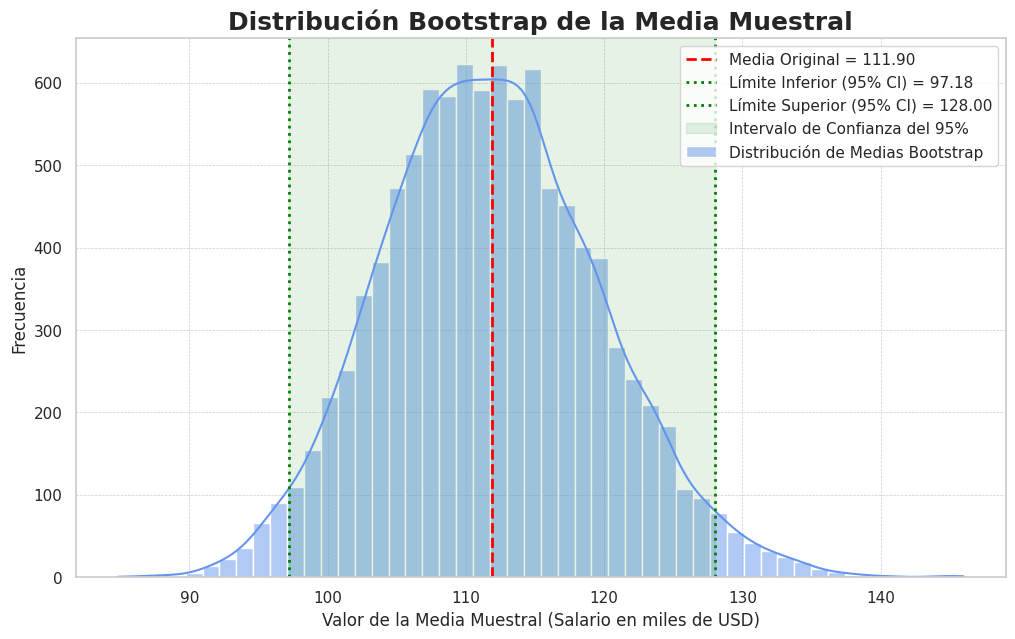


--- Resultados de la Inferencia Bootstrap ---
Media de la muestra original: 111.9048
Error Est√°ndar estimado por Bootstrap: 7.8218
Sesgo estimado por Bootstrap: -0.0609
Intervalo de Confianza del 95% para la media: [97.1811, 127.9983]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Configuraci√≥n y Datos Originales ---
# Usemos una semilla para que los resultados sean siempre los mismos y se puedan replicar.
np.random.seed(42)

# Creamos nuestra "muestra original". Imaginemos que son los salarios anuales (en miles de USD)
# de 150 empleados. Usamos una distribuci√≥n log-normal porque los salarios suelen tener un sesgo a la derecha.
# Esto hace que el Bootstrap sea especialmente √∫til, ya que no podemos asumir normalidad.
datos_originales = np.random.lognormal(mean=4.5, sigma=0.8, size=150)
n = len(datos_originales)

# Calculamos la media de nuestra muestra original. Este es nuestro mejor "punto de partida".
media_original = np.mean(datos_originales)


# --- 2. Proceso de Remuestreo Bootstrap ---
# Definimos el n√∫mero de muestras bootstrap que vamos a generar. Un n√∫mero alto (miles) es lo ideal.
B = 10000
# Creamos una lista vac√≠a para guardar la media de cada muestra bootstrap.
bootstrap_medias = []

# Este es el coraz√≥n del m√©todo Bootstrap:
print(f"Iniciando el proceso Bootstrap con {B} simulaciones...")
for i in range(B):
    # a) Muestreo con reemplazo: Creamos una nueva muestra del mismo tama√±o que la original.
    muestra_bootstrap = np.random.choice(datos_originales, size=n, replace=True)

    # b) C√°lculo del estad√≠stico: Calculamos la media de esta nueva muestra.
    media_bootstrap = np.mean(muestra_bootstrap)

    # c) Guardamos el resultado.
    bootstrap_medias.append(media_bootstrap)

print("Proceso Bootstrap finalizado.")

# Convertimos la lista a un array de NumPy para facilitar los c√°lculos.
bootstrap_medias = np.array(bootstrap_medias)


# --- 3. Inferencia a partir de la Distribuci√≥n Bootstrap ---
# Ahora que tenemos la distribuci√≥n emp√≠rica de la media, podemos calcular lo que nos interesa.

# a) Error Est√°ndar: Es simplemente la desviaci√≥n est√°ndar de nuestra distribuci√≥n de medias bootstrap.
#    Mide qu√© tan variable es nuestro estimador (la media).
error_estandar_bootstrap = np.std(bootstrap_medias, ddof=1) # ddof=1 para muestra

# b) Sesgo (Bias): Mide si nuestro estimador original tiende a sobreestimar o subestimar el valor.
sesgo_bootstrap = np.mean(bootstrap_medias) - media_original

# c) Intervalo de Confianza (M√©todo del Percentil): Es la forma m√°s intuitiva.
#    Simplemente tomamos los percentiles que encierran el 95% central de nuestra distribuci√≥n.
alpha = 0.05 # Para un 95% de confianza
limite_inferior = np.percentile(bootstrap_medias, 100 * (alpha / 2))
limite_superior = np.percentile(bootstrap_medias, 100 * (1 - alpha / 2))


# --- 4. Visualizaci√≥n Atractiva de los Resultados ---
# Usamos Seaborn para un estilo m√°s limpio y profesional.
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))

# Histograma de la distribuci√≥n de las medias bootstrap
sns.histplot(bootstrap_medias, bins=50, kde=True, color="cornflowerblue", label="Distribuci√≥n de Medias Bootstrap")

# L√≠neas verticales para marcar los puntos clave
plt.axvline(media_original, color='red', linestyle='--', linewidth=2, label=f'Media Original = {media_original:.2f}')
plt.axvline(limite_inferior, color='green', linestyle=':', linewidth=2, label=f'L√≠mite Inferior (95% CI) = {limite_inferior:.2f}')
plt.axvline(limite_superior, color='green', linestyle=':', linewidth=2, label=f'L√≠mite Superior (95% CI) = {limite_superior:.2f}')

# Sombrear el √°rea del intervalo de confianza para mayor claridad
plt.axvspan(limite_inferior, limite_superior, color='green', alpha=0.1, label='Intervalo de Confianza del 95%')

# T√≠tulos y etiquetas
plt.title('Distribuci√≥n Bootstrap de la Media Muestral', fontsize=18, fontweight='bold')
plt.xlabel('Valor de la Media Muestral (Salario en miles de USD)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Mostramos el gr√°fico
plt.show()

# --- 5. Imprimir Resultados ---
print("\n--- Resultados de la Inferencia Bootstrap ---")
print(f"Media de la muestra original: {media_original:.4f}")
print(f"Error Est√°ndar estimado por Bootstrap: {error_estandar_bootstrap:.4f}")
print(f"Sesgo estimado por Bootstrap: {sesgo_bootstrap:.4f}")
print(f"Intervalo de Confianza del 95% para la media: [{limite_inferior:.4f}, {limite_superior:.4f}]")

In [ ]:
# Importaci√≥n de librer√≠as necesarias para mostrar HTML en Google Colab
from IPython.display import display, HTML

# --- PLANTILLA HTML COMPLETA PARA RANDOM FOREST ---
html_random_forest = """
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Random Forest: Desarrollo Te√≥rico Completo</title>

  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;500;600;700&family=JetBrains+Mono:wght@400;500&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">

  <script>
    window.MathJax = {
      tex: {
        inlineMath: [['$', '$'], ['\\\\(', '\\\\)']],
        displayMath: [['$$', '$$'], ['\\\\[', '\\\\]']],
        processEscapes: true,
        processEnvironments: true,
        packages: {'[+]': ['ams']} // 'ams' package is needed for \\underbrace
      },
      svg: { fontCache: 'global' },
      startup: { ready: () => { MathJax.startup.defaultReady(); } }
    };
  </script>
  <script src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.2.2/es5/tex-mml-chtml.min.js" async></script>

  <style>
    :root {
      --primary-gradient: linear-gradient(135deg, #2af598 0%, #009efd 100%);
      --success-gradient: linear-gradient(135deg, #2af598 0%, #009efd 100%);
      --bg-primary: linear-gradient(135deg, #f5f7fa 0%, #c3cfe2 100%);
      --bg-card: rgba(255, 255, 255, 0.95);
      --bg-content: rgba(248, 250, 252, 0.9);
      --text-primary: #2d3748;
      --text-secondary: #4a5568;
      --text-muted: #718096;
      --accent-primary: #009efd;
      --border-color: rgba(0, 0, 0, 0.08);
      --shadow-md: 0 4px 12px rgba(0, 0, 0, 0.1);
      --shadow-lg: 0 10px 25px rgba(0, 0, 0, 0.15);
      --radius-lg: 16px;
      --transition-normal: all 0.3s cubic-bezier(0.4, 0, 0.2, 1);
    }
    [data-theme="dark"] {
      --bg-primary: linear-gradient(135deg, #1a202c 0%, #2d3748 50%, #4a5568 100%);
      --bg-card: rgba(45, 55, 72, 0.95);
      --bg-content: rgba(26, 32, 44, 0.9);
      --text-primary: #f7fafc;
      --text-secondary: #e2e8f0;
      --text-muted: #a0aec0;
      --border-color: rgba(255, 255, 255, 0.1);
    }
    * { margin: 0; padding: 0; box-sizing: border-box; }
    html { scroll-behavior: smooth; }
    body { font-family: 'Inter', sans-serif; background: var(--bg-primary); color: var(--text-primary); line-height: 1.6; transition: var(--transition-normal); min-height: 100vh; position: relative; overflow-x: hidden; padding: 1rem; }
    .particles-canvas { position: fixed; top: 0; left: 0; width: 100%; height: 100%; pointer-events: none; z-index: -1; opacity: 0.6; }
    .theme-toggle { position: fixed; top: 2rem; right: 2rem; width: 56px; height: 56px; border-radius: 50%; background: var(--bg-card); backdrop-filter: blur(20px); border: 1px solid var(--border-color); box-shadow: var(--shadow-lg); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.25rem; color: var(--accent-primary); transition: var(--transition-normal); z-index: 1000; }
    .theme-toggle:hover { transform: scale(1.1) rotate(180deg); }
    .main-container { max-width: 900px; margin: 0 auto; padding: 2rem 0; }
    .main-title { text-align: center; font-size: clamp(2rem, 5vw, 3rem); font-weight: 700; margin-bottom: 3rem; background: var(--primary-gradient); -webkit-background-clip: text; -webkit-text-fill-color: transparent; position: relative; }
    .main-title::after { content: ''; position: absolute; bottom: -10px; left: 50%; transform: translateX(-50%); width: 60px; height: 4px; background: var(--accent-primary); border-radius: 2px; }
    .accordion-container { display: flex; flex-direction: column; gap: 1.5rem; }
    .topic-card { background: var(--bg-card); backdrop-filter: blur(20px); border-radius: var(--radius-lg); border: 1px solid var(--border-color); box-shadow: var(--shadow-md); overflow: hidden; transition: var(--transition-normal); position: relative; animation: fadeInUp 0.6s ease-out; animation-fill-mode: both; }
    .topic-card:nth-child(1) { animation-delay: 0.1s; } .topic-card:nth-child(2) { animation-delay: 0.2s; } .topic-card:nth-child(3) { animation-delay: 0.3s; } .topic-card:nth-child(4) { animation-delay: 0.4s; } .topic-card:nth-child(5) { animation-delay: 0.5s; } .topic-card:nth-child(6) { animation-delay: 0.6s; } .topic-card:nth-child(7) { animation-delay: 0.7s; } .topic-card:nth-child(8) { animation-delay: 0.8s; }.topic-card:nth-child(9) { animation-delay: 0.9s; }
    .topic-card::before { content: ''; position: absolute; top: 0; left: 0; right: 0; height: 3px; background: var(--primary-gradient); transform: scaleX(0); transition: var(--transition-normal); }
    .topic-card:hover { transform: translateY(-2px); box-shadow: var(--shadow-lg); }
    .topic-card.active::before { transform: scaleX(1); }
    .topic-header { cursor: pointer; padding: 1.5rem 2rem; display: flex; justify-content: space-between; align-items: center; }
    .topic-title { font-size: 1.25rem; font-weight: 600; color: var(--text-primary); display: flex; align-items: center; gap: 0.75rem; }
    .topic-icon { width: 32px; height: 32px; border-radius: 50%; background: var(--success-gradient); display: flex; align-items: center; justify-content: center; color: white; font-size: 0.875rem; }
    .expand-icon { font-size: 1.125rem; color: var(--text-muted); transition: var(--transition-normal); }
    .topic-card.active .expand-icon { transform: rotate(180deg); color: var(--accent-primary); }
    .topic-content { max-height: 0; overflow: hidden; transition: max-height 0.8s cubic-bezier(0.4, 0, 0.2, 1), padding 0.8s cubic-bezier(0.4, 0, 0.2, 1); background: var(--bg-content); border-top: 1px solid transparent; }
    .topic-card.active .topic-content { max-height: 2000px; padding: 2rem; border-top-color: var(--border-color); }
    .topic-content h4 { font-size: 1.125rem; font-weight: 600; color: var(--text-primary); margin-bottom: 1rem; display: flex; align-items: center; gap: 0.5rem; }
    .topic-content h4::before { content: ''; width: 4px; height: 20px; background: var(--accent-primary); border-radius: 2px; }
    .topic-content p, .topic-content li { line-height: 1.7; color: var(--text-secondary); margin-bottom: 1rem; }
    .topic-content strong { color: var(--text-primary); font-weight: 600; }
    .formula-block { padding: 1.5rem; background: rgba(0, 0, 0, 0.03); border: 1px solid var(--border-color); border-radius: 12px; text-align: center; margin: 1.5rem 0; overflow-x: auto; font-family: 'JetBrains Mono', monospace; }
    [data-theme="dark"] .formula-block { background: rgba(255, 255, 255, 0.05); }
    .topic-content blockquote { border-left: 4px solid var(--accent-primary); margin: 1.5rem 0; padding: 1.25rem 1.5rem; background: rgba(0, 158, 253, 0.08); border-radius: 0 12px 12px 0; font-style: italic; color: var(--text-secondary); }
    .table-container { overflow-x: auto; margin: 1.5rem 0; border-radius: 12px; border: 1px solid var(--border-color); }
    .topic-content table { width: 100%; border-collapse: collapse; }
    .topic-content th, .topic-content td { padding: 1rem; text-align: left; border-bottom: 1px solid var(--border-color); }
    .topic-content th { background: rgba(0, 158, 253, 0.1); font-weight: 600; text-transform: uppercase; letter-spacing: 0.05em; }
    .footer { text-align: center; margin-top: 4rem; padding: 2rem 0; border-top: 1px solid var(--border-color); color: var(--text-muted); font-size: 0.875rem; }
    @keyframes fadeInUp { from { opacity: 0; transform: translateY(30px); } to { opacity: 1; transform: translateY(0); } }
  </style>
</head>

<body data-theme="dark">
  <canvas class="particles-canvas" id="particlesCanvas"></canvas>
  <div class="theme-toggle" id="themeToggle" role="button" aria-label="Cambiar tema"><i class="fas fa-moon" id="themeIcon"></i></div>

  <div class="main-container">
    <h1 class="main-title">Random Forest: Desarrollo Te√≥rico Completo</h1>

    <div class="accordion-container">
      <!-- 1. Introducci√≥n -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title"><div class="topic-icon"><i class="fas fa-lightbulb"></i></div>Introducci√≥n Conceptual</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <p>Random Forest es un algoritmo de <strong>ensemble learning</strong> que combina la estrategia de <strong>Bagging</strong> (bootstrap + agregaci√≥n) con la <strong>aleatorizaci√≥n en la selecci√≥n de atributos</strong>, para construir una colecci√≥n de √°rboles de decisi√≥n que, unidos, forman un modelo robusto y preciso.</p>
          <blockquote>‚ÄúMuchos √°rboles d√©biles e inestables pueden juntarse para formar un modelo fuerte y estable, si se entrenan con diversidad.‚Äù</blockquote>
        </div>
      </div>

      <!-- 2. Fundamentos -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title"><div class="topic-icon"><i class="fas fa-layer-group"></i></div>Fundamentos Estad√≠sticos</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
            <h4>Bagging como Base Estructural</h4><p>Cada √°rbol del bosque es entrenado sobre un subconjunto bootstrap de los datos, lo que genera variabilidad inicial entre los √°rboles.</p>
            <h4>Aumento de Diversidad (El "Random" en Random Forest)</h4><p>A diferencia del Bagging puro, en cada nodo de cada √°rbol, se selecciona un <strong>subconjunto aleatorio de caracter√≠sticas</strong> ($k < m$) para decidir la divisi√≥n. Esto evita que √°rboles diferentes aprendan patrones id√©nticos y es la clave para descorrelacionarlos.</p>
        </div>
      </div>

      <!-- 3. Algoritmo -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title"><div class="topic-icon"><i class="fas fa-list-ol"></i></div>Algoritmo Paso a Paso</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
            <p>Dado un dataset $D = \\{(x_i, y_i)\\}_{i=1}^n$ con $m$ caracter√≠sticas, y elegidos los hiperpar√°metros $B$ (n¬∫ de √°rboles) y $k$ (n¬∫ de atributos por divisi√≥n):</p>
            <p><strong>Para cada √°rbol $b=1, \\dots, B$:</strong></p>
            <ol>
                <li>Crear una muestra bootstrap $D^{(b)}$ de tama√±o $n$ a partir de $D$.</li>
                <li>Construir un √°rbol de decisi√≥n sobre $D^{(b)}$: en cada divisi√≥n, elegir aleatoriamente $k$ de las $m$ variables y seleccionar la mejor divisi√≥n <strong>solo dentro de ese subconjunto</strong>.</li>
            </ol>
            <p><strong>Para una nueva observaci√≥n $x$:</strong></p>
            <ul>
                <li><strong>Clasificaci√≥n:</strong> se toma la clase m√°s votada entre los $B$ √°rboles.</li>
                <li><strong>Regresi√≥n:</strong> se promedia la salida de los $B$ √°rboles.</li>
            </ul>
        </div>
      </div>

      <!-- 4. F√≥rmulas Clave -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title"><div class="topic-icon"><i class="fas fa-calculator"></i></div>F√≥rmulas Clave</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <h4>Predicci√≥n en Regresi√≥n</h4>
          <div class="formula-block">$$ \\hat{f}(x) = \\frac{1}{B} \\sum_{b=1}^{B} f^{(b)}(x) $$</div>
          <h4>Descomposici√≥n del Error Esperado</h4>
          <p>El error de un ensamble se puede descomponer. Random Forest busca minimizar la covarianza para reducir el error general:</p>
          <div class="formula-block">$$ \\text{Error}(x) = \\underbrace{\\text{Sesgo}^2}_{\\text{sistem√°tico}} + \\underbrace{\\text{Varianza}}_{\\text{dispersi√≥n}} - \\underbrace{\\text{Covarianza}}_{\\text{diversidad}} $$</div>
        </div>
      </div>

      <!-- 5. Ventajas -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title"><div class="topic-icon"><i class="fas fa-star"></i></div>Ventajas Te√≥ricas</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <div class="table-container">
            <table>
              <thead><tr><th>Ventaja</th><th>Explicaci√≥n</th></tr></thead>
              <tbody>
                <tr><td>üéØ Precisi√≥n Alta</td><td>Suele superar a modelos individuales en la mayor√≠a de tareas.</td></tr>
                <tr><td>üß† No Requiere Normalizaci√≥n</td><td>Es insensible a la escala de las variables.</td></tr>
                <tr><td>üìâ Robusto al Overfitting</td><td>La agregaci√≥n de m√∫ltiples √°rboles reduce el sobreajuste.</td></tr>
                <tr><td>üé≤ Resistente al Ruido</td><td>El promedio de m√∫ltiples modelos mitiga el impacto de outliers.</td></tr>
                <tr><td>üîç Estimaci√≥n de Importancia</td><td>Provee m√©tricas internas de importancia de variables y error OOB.</td></tr>
              </tbody>
            </table>
        </div>
      </div>

      <!-- 6. Limitaciones -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title"><div class="topic-icon"><i class="fas fa-exclamation-triangle"></i></div>Limitaciones Te√≥ricas</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <div class="table-container">
            <table>
              <thead><tr><th>Limitaci√≥n</th><th>Implicaci√≥n</th></tr></thead>
              <tbody>
                <tr><td>üîÑ Modelo "Caja Negra"</td><td>Es m√°s dif√≠cil de interpretar que un √∫nico √°rbol de decisi√≥n.</td></tr>
                <tr><td>üê¢ Costoso Computacionalmente</td><td>Entrenar muchos √°rboles grandes puede ser lento y consumir memoria.</td></tr>
                <tr><td>üßÆ No Extrapola Bien</td><td>En regresi√≥n, no puede predecir valores fuera del rango de entrenamiento.</td></tr>
                <tr><td>‚öñÔ∏è Sesgo con Variables Irrelevantes</td><td>Si hay muchas variables sin informaci√≥n, pueden diluir la se√±al.</td></tr>
              </tbody>
            </table>
        </div>
      </div>

      <!-- 7. Validaci√≥n Interna -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title"><div class="topic-icon"><i class="fas fa-recycle"></i></div>Estimaci√≥n OOB (Out-of-Bag)</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <p>Una ventaja crucial del Random Forest es que permite estimar el error de generalizaci√≥n sin necesidad de validaci√≥n cruzada. Cuando se genera cada muestra bootstrap, alrededor del <strong>36.8%</strong> de los datos quedan fuera (out-of-bag, OOB). Se puede usar esta porci√≥n para evaluar el rendimiento de los √°rboles que no la vieron, obteniendo un estimador insesgado del error de generalizaci√≥n.</p>
        </div>
      </div>

      <!-- 8. Comparaci√≥n -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title"><div class="topic-icon"><i class="fas fa-balance-scale"></i></div>Comparaci√≥n con Otros M√©todos</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <div class="table-container">
            <table>
              <thead><tr><th>M√©todo</th><th>Reduce Varianza</th><th>Reduce Sesgo</th><th>Tuning Complejo</th><th>Paralelizable</th></tr></thead>
              <tbody>
                <tr><td>√Årbol √önico</td><td>‚ùå</td><td>‚ùå</td><td>‚úÖ</td><td>‚úÖ</td></tr>
                <tr><td>Bagging</td><td>‚úÖ</td><td>‚ùå</td><td>‚ùå</td><td>‚úÖ</td></tr>
                <tr><td>Boosting</td><td>‚ùå</td><td>‚úÖ</td><td>‚úÖ</td><td>‚ùå</td></tr>
                <tr><td><strong>Random Forest</strong></td><td><strong>‚úÖ‚úÖ</strong></td><td>‚ùå</td><td>‚ùå</td><td>‚úÖ</td></tr>
              </tbody>
            </table>
        </div>
      </div>

      <!-- 9. Conclusi√≥n -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title"><div class="topic-icon"><i class="fas fa-flag-checkered"></i></div>Conclusi√≥n y Concepto Clave</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <h4>Conclusi√≥n</h4>
          <p>Random Forest es un algoritmo de ensamble que combina m√∫ltiples √°rboles de decisi√≥n entrenados sobre muestras bootstrap y con aleatoriedad en la selecci√≥n de atributos. Su base te√≥rica se sustenta en la reducci√≥n de varianza a trav√©s del bagging y en la diversificaci√≥n estructural de modelos mediante selecci√≥n aleatoria de variables. Es una herramienta potente, robusta y validada para clasificaci√≥n y regresi√≥n.</p>
          <h4>Concepto Clave</h4>
          <blockquote>Random Forest es una t√©cnica de aprendizaje en conjunto que reduce la varianza y mejora la generalizaci√≥n, al combinar √°rboles de decisi√≥n diversos y entrenados sobre subconjuntos aleatorios de datos y atributos.</blockquote>
        </div>
      </div>
    </div>
    <div class="footer"><p>Elaborado por profesor Sergio Gevatschnaider</p></div>
  </div>

  <script>
    (function() {
      const themeToggle = document.getElementById('themeToggle');
      const themeIcon = document.getElementById('themeIcon');
      const bodyEl = document.body;
      function setTheme(theme) {
        bodyEl.setAttribute('data-theme', theme);
        localStorage.setItem('theme', theme);
        if (themeIcon) { themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon'; }
      }
      themeToggle.addEventListener('click', () => { setTheme(bodyEl.getAttribute('data-theme') === 'dark' ? 'light' : 'dark'); });
      setTheme(localStorage.getItem('theme') || 'dark');

      document.querySelectorAll('.topic-header').forEach(header => {
        header.addEventListener('click', () => {
          const card = header.parentElement;
          if (!card.classList.contains('active')) {
            card.classList.add('active');
            if (window.MathJax && card.querySelector('.topic-content')) {
              MathJax.typesetPromise([card.querySelector('.topic-content')]).catch(err => console.error('MathJax error:', err));
            }
          } else {
            card.classList.remove('active');
          }
        });
      });

      const canvas = document.getElementById('particlesCanvas');
      if (canvas) {
        const ctx = canvas.getContext('2d');
        let particles = [];
        const particleCount = 50;
        function setCanvasSize() { canvas.width = window.innerWidth; canvas.height = window.innerHeight; }
        class Particle {
          constructor() { this.x = Math.random() * canvas.width; this.y = Math.random() * canvas.height; this.size = Math.random() * 2 + 1; this.speedX = Math.random() * 1 - 0.5; this.speedY = Math.random() * 1 - 0.5; }
          update() { if (this.x > canvas.width || this.x < 0) this.speedX = -this.speedX; if (this.y > canvas.height || this.y < 0) this.speedY = -this.speedY; this.x += this.speedX; this.y += this.speedY; }
          draw(theme) { ctx.fillStyle = theme === 'dark' ? 'rgba(255, 255, 255, 0.5)' : 'rgba(0, 0, 0, 0.5)'; ctx.beginPath(); ctx.arc(this.x, this.y, this.size, 0, Math.PI * 2); ctx.fill(); }
        }
        function initParticles() { particles = []; for (let i = 0; i < particleCount; i++) { particles.push(new Particle()); } }
        function animateParticles() { const theme = document.body.getAttribute('data-theme'); ctx.clearRect(0, 0, canvas.width, canvas.height); particles.forEach(p => { p.update(); p.draw(theme); }); requestAnimationFrame(animateParticles); }
        window.addEventListener('resize', () => { setCanvasSize(); initParticles(); });
        setCanvasSize(); initParticles(); animateParticles();
      }

      const firstCard = document.querySelector('.topic-card');
      if (firstCard) {
        firstCard.classList.add('active');
        setTimeout(() => {
          if (window.MathJax) {
            MathJax.typesetPromise([firstCard.querySelector('.topic-content')]).catch(err => console.error('MathJax error:', err));
          }
        }, 100);
      }
    })();
  </script>
</body>
</html>
"""

# Renderizar el HTML final en la salida de la celda de Google Colab
display(HTML(html_random_forest))

Entrenando un Random Forest con 100 √°rboles...
Entrenamiento finalizado.

--- Resultados del Modelo ---
Precisi√≥n en el conjunto de prueba: 0.9000
Error Out-of-Bag (OOB) Score: 0.8714

Importancia de las caracter√≠sticas:
  - Caracter√≠stica 1: 0.6609
  - Caracter√≠stica 2: 0.3391


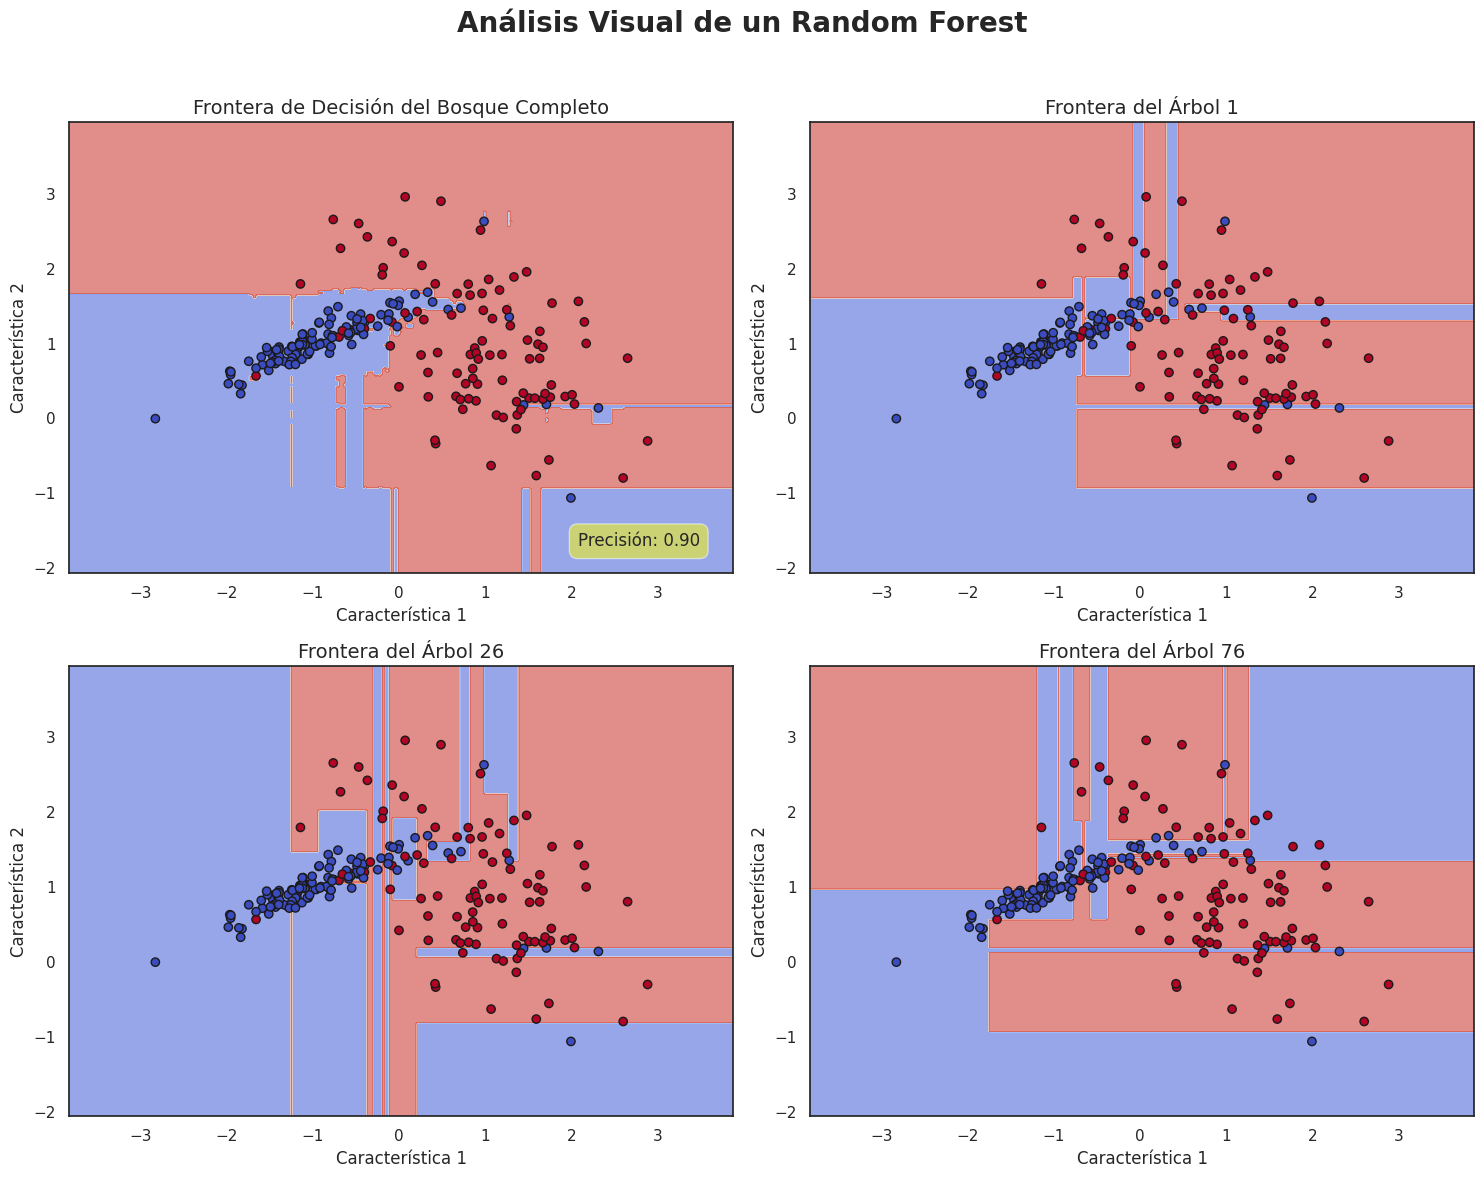

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# --- 1. Preparaci√≥n de los Datos ---
# Generamos un conjunto de datos sint√©tico para clasificaci√≥n.
# Tener solo 2 caracter√≠sticas nos permite visualizar las fronteras de decisi√≥n.
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, flip_y=0.1, random_state=42)

# Dividimos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# --- 2. Creaci√≥n y Entrenamiento del Modelo Random Forest ---
# Aqu√≠ aplicamos la teor√≠a:
# n_estimators: El n√∫mero de √°rboles en el bosque (B).
# max_features: El n√∫mero de caracter√≠sticas a considerar en cada divisi√≥n (k). 'sqrt' es una regla com√∫n.
# oob_score=True: Para calcular el error Out-of-Bag, una validaci√≥n interna gratuita gracias al bagging.
n_arboles = 100
modelo_rf = RandomForestClassifier(n_estimators=n_arboles,
                                   max_features='sqrt',
                                   oob_score=True,
                                   random_state=42)

print(f"Entrenando un Random Forest con {n_arboles} √°rboles...")
modelo_rf.fit(X_train, y_train)
print("Entrenamiento finalizado.")


# --- 3. Evaluaci√≥n y An√°lisis Interno ---
# Hacemos predicciones en el conjunto de prueba
y_pred = modelo_rf.predict(X_test)
precision = accuracy_score(y_test, y_pred)

print("\n--- Resultados del Modelo ---")
print(f"Precisi√≥n en el conjunto de prueba: {precision:.4f}")
# El OOB score es una estimaci√≥n del rendimiento del modelo en datos no vistos,
# calculado usando los datos que no se incluyeron en el bootstrap de cada √°rbol.
print(f"Error Out-of-Bag (OOB) Score: {modelo_rf.oob_score_:.4f}")

# Importancia de las caracter√≠sticas
print("\nImportancia de las caracter√≠sticas:")
for i, importancia in enumerate(modelo_rf.feature_importances_):
    print(f"  - Caracter√≠stica {i+1}: {importancia:.4f}")


# --- 4. Visualizaci√≥n del Bosque y los √Årboles ---
sns.set_theme(style="white")

# Funci√≥n auxiliar para graficar las fronteras de decisi√≥n
def plot_decision_boundary(X, y, model, ax, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Caracter√≠stica 1')
    ax.set_ylabel('Caracter√≠stica 2')

# Creamos una figura para comparar el bosque completo con algunos √°rboles individuales
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('An√°lisis Visual de un Random Forest', fontsize=20, fontweight='bold')

# a) Graficamos la frontera de decisi√≥n del BOSQUE COMPLETO
plot_decision_boundary(X_train, y_train, modelo_rf, axes[0, 0], 'Frontera de Decisi√≥n del Bosque Completo')
axes[0, 0].text(0.95, 0.05, f'Precisi√≥n: {precision:.2f}', transform=axes[0,0].transAxes,
                fontsize=12, verticalalignment='bottom', horizontalalignment='right',
                bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))


# b) Graficamos las fronteras de algunos √ÅRBOLES INDIVIDUALES
# Accedemos a los estimadores (√°rboles) dentro del modelo entrenado.
arboles_a_mostrar = [modelo_rf.estimators_[0], modelo_rf.estimators_[25], modelo_rf.estimators_[75]]
titulos_arboles = ['Frontera del √Årbol 1', 'Frontera del √Årbol 26', 'Frontera del √Årbol 76']
axes_planos = [axes[0, 1], axes[1, 0], axes[1, 1]]

for i, arbol in enumerate(arboles_a_mostrar):
    plot_decision_boundary(X_train, y_train, arbol, axes_planos[i], titulos_arboles[i])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
# Importaci√≥n de librer√≠as necesarias para mostrar HTML en Google Colab
from IPython.display import display, HTML

# --- PLANTILLA HTML COMPLETA PARA BOOSTING ---
html_boosting = """
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Ensembles: Boosting - Desarrollo Te√≥rico</title>

  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;500;600;700&family=JetBrains+Mono:wght@400;500&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">

  <script>
    window.MathJax = {
      tex: {
        inlineMath: [['$', '$'], ['\\\\(', '\\\\)']],
        displayMath: [['$$', '$$'], ['\\\\[', '\\\\]']],
        packages: {'[+]': ['ams']}
      },
      svg: { fontCache: 'global' }
    };
  </script>
  <script src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.2.2/es5/tex-mml-chtml.min.js" async></script>

  <style>
    :root {
      --primary-gradient: linear-gradient(135deg, #ff9a9e 0%, #fecfef 100%);
      --bg-primary: linear-gradient(135deg, #f5f7fa 0%, #c3cfe2 100%);
      --bg-card: rgba(255, 255, 255, 0.95);
      --bg-content: rgba(248, 250, 252, 0.9);
      --text-primary: #2d3748;
      --text-secondary: #4a5568;
      --text-muted: #718096;
      --accent-primary: #ff7e5f;
      --border-color: rgba(0, 0, 0, 0.08);
      --shadow-md: 0 4px 12px rgba(0, 0, 0, 0.1);
      --shadow-lg: 0 10px 25px rgba(0, 0, 0, 0.15);
      --radius-lg: 16px;
      --transition-normal: all 0.3s cubic-bezier(0.4, 0, 0.2, 1);
    }
    [data-theme="dark"] {
      --primary-gradient: linear-gradient(135deg, #e14fad 0%, #f9d423 100%);
      --bg-primary: linear-gradient(135deg, #1a202c 0%, #2d3748 50%, #4a5568 100%);
      --bg-card: rgba(45, 55, 72, 0.95);
      --bg-content: rgba(26, 32, 44, 0.9);
      --text-primary: #f7fafc;
      --text-secondary: #e2e8f0;
      --text-muted: #a0aec0;
      --accent-primary: #f09819;
      --border-color: rgba(255, 255, 255, 0.1);
    }
    * { margin: 0; padding: 0; box-sizing: border-box; }
    html { scroll-behavior: smooth; }
    body { font-family: 'Inter', sans-serif; background: var(--bg-primary); color: var(--text-primary); line-height: 1.6; transition: var(--transition-normal); min-height: 100vh; position: relative; overflow-x: hidden; padding: 1rem; }
    .particles-canvas { position: fixed; top: 0; left: 0; width: 100%; height: 100%; pointer-events: none; z-index: -1; opacity: 0.6; }
    .theme-toggle { position: fixed; top: 2rem; right: 2rem; width: 56px; height: 56px; border-radius: 50%; background: var(--bg-card); backdrop-filter: blur(20px); border: 1px solid var(--border-color); box-shadow: var(--shadow-lg); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.25rem; color: var(--accent-primary); transition: var(--transition-normal); z-index: 1000; }
    .theme-toggle:hover { transform: scale(1.1) rotate(180deg); }
    .main-container { max-width: 900px; margin: 0 auto; padding: 2rem 0; }
    .main-title { text-align: center; font-size: clamp(2rem, 5vw, 3rem); font-weight: 700; margin-bottom: 3rem; background: var(--primary-gradient); -webkit-background-clip: text; -webkit-text-fill-color: transparent; position: relative; }
    .main-title::after { content: ''; position: absolute; bottom: -10px; left: 50%; transform: translateX(-50%); width: 60px; height: 4px; background: var(--accent-primary); border-radius: 2px; }
    .accordion-container { display: flex; flex-direction: column; gap: 1.5rem; }
    .topic-card { background: var(--bg-card); backdrop-filter: blur(20px); border-radius: var(--radius-lg); border: 1px solid var(--border-color); box-shadow: var(--shadow-md); overflow: hidden; transition: var(--transition-normal); position: relative; animation: fadeInUp 0.6s ease-out; animation-fill-mode: both; }
    .topic-card:nth-child(1) { animation-delay: 0.1s; } .topic-card:nth-child(2) { animation-delay: 0.2s; } .topic-card:nth-child(3) { animation-delay: 0.3s; } .topic-card:nth-child(4) { animation-delay: 0.4s; } .topic-card:nth-child(5) { animation-delay: 0.5s; } .topic-card:nth-child(6) { animation-delay: 0.6s; } .topic-card:nth-child(7) { animation-delay: 0.7s; } .topic-card:nth-child(8) { animation-delay: 0.8s; }.topic-card:nth-child(9) { animation-delay: 0.9s; }.topic-card:nth-child(10) { animation-delay: 1s; }
    .topic-card::before { content: ''; position: absolute; top: 0; left: 0; right: 0; height: 3px; background: var(--primary-gradient); transform: scaleX(0); transition: var(--transition-normal); }
    .topic-card:hover { transform: translateY(-2px); box-shadow: var(--shadow-lg); }
    .topic-card.active::before { transform: scaleX(1); }
    .topic-header { cursor: pointer; padding: 1.5rem 2rem; display: flex; justify-content: space-between; align-items: center; }
    .topic-title { font-size: 1.25rem; font-weight: 600; color: var(--text-primary); }
    .expand-icon { font-size: 1.125rem; color: var(--text-muted); transition: var(--transition-normal); }
    .topic-card.active .expand-icon { transform: rotate(180deg); color: var(--accent-primary); }
    .topic-content { max-height: 0; overflow: hidden; transition: max-height 0.8s cubic-bezier(0.4, 0, 0.2, 1), padding 0.8s cubic-bezier(0.4, 0, 0.2, 1); background: var(--bg-content); border-top: 1px solid transparent; }
    .topic-card.active .topic-content { max-height: 2000px; padding: 2rem; border-top-color: var(--border-color); }
    .topic-content h4 { font-size: 1.125rem; font-weight: 600; margin-bottom: 1rem; }
    .topic-content p, .topic-content li { line-height: 1.7; color: var(--text-secondary); margin-bottom: 1rem; }
    .topic-content strong { color: var(--text-primary); font-weight: 600; }
    .topic-content blockquote { border-left: 4px solid var(--accent-primary); margin: 1.5rem 0; padding: 1.25rem 1.5rem; background: rgba(255, 126, 95, 0.08); border-radius: 0 12px 12px 0; font-style: italic; color: var(--text-secondary); }
    .formula-block { padding: 1.5rem; background: rgba(0, 0, 0, 0.03); border: 1px solid var(--border-color); border-radius: 12px; text-align: center; margin: 1.5rem 0; overflow-x: auto; font-family: 'JetBrains Mono', monospace; }
    .table-container { overflow-x: auto; margin: 1.5rem 0; border-radius: 12px; border: 1px solid var(--border-color); }
    .topic-content table { width: 100%; border-collapse: collapse; }
    .topic-content th, .topic-content td { padding: 1rem; text-align: left; border-bottom: 1px solid var(--border-color); }
    .topic-content th { background: rgba(255, 126, 95, 0.1); font-weight: 600; }
    .footer { text-align: center; margin-top: 4rem; padding: 2rem 0; border-top: 1px solid var(--border-color); color: var(--text-muted); font-size: 0.875rem; }
    @keyframes fadeInUp { from { opacity: 0; transform: translateY(30px); } to { opacity: 1; transform: translateY(0); } }
  </style>
</head>

<body data-theme="dark">
  <canvas class="particles-canvas" id="particlesCanvas"></canvas>
  <div class="theme-toggle" id="themeToggle" role="button" aria-label="Cambiar tema"><i class="fas fa-moon" id="themeIcon"></i></div>

  <div class="main-container">
    <h1 class="main-title">Ensembles: Boosting</h1>

    <div class="accordion-container">
      <!-- 1. ¬øQu√© es? -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">¬øQu√© es Boosting?</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <p>Boosting es una t√©cnica de aprendizaje en conjunto cuyo objetivo es construir un modelo fuerte a partir de una <strong>secuencia de modelos d√©biles</strong> (ej. √°rboles muy poco profundos).</p>
          <p>Su diferencia clave con Bagging es que los modelos no se entrenan de forma independiente, sino de manera <strong>secuencial</strong>, de modo que cada modelo intenta corregir los errores del anterior.</p>
        </div>
      </div>

      <!-- 2. Principio Estad√≠stico -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Principio Estad√≠stico Subyacente</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
            <p>Boosting se fundamenta en la idea de la <strong>reducci√≥n del sesgo</strong> del modelo. Mientras que Bagging reduce la varianza, Boosting se orienta a disminuir el sesgo al construir el modelo de forma aditiva y corregida.</p>
            <p>Desde una perspectiva funcional, Boosting puede verse como una t√©cnica de optimizaci√≥n donde se construye una funci√≥n $F(x)$ que se aproxima a la funci√≥n objetivo $f(x)$ minimizando una funci√≥n de p√©rdida $L(y, F(x))$.</p>
        </div>
      </div>

      <!-- 3. Funcionamiento General -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Funcionamiento General del Boosting</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <p>El proceso general puede resumirse as√≠:</p>
          <ol>
            <li>Se inicia con un modelo base $f_1(x)$.</li>
            <li>Se eval√∫an sus errores y se da m√°s importancia a los ejemplos mal clasificados.</li>
            <li>Se entrena un nuevo modelo $f_2(x)$ enfocado en esos errores.</li>
            <li>Se repite para $T$ iteraciones.</li>
          </ol>
          <p>La predicci√≥n final es una combinaci√≥n ponderada de todos los modelos $\\{f_1, \\dots, f_T\\}$, donde $\\alpha_t$ es el peso o confianza del modelo $t$:</p>
          <div class="formula-block">$$ \\hat{y}(x) = \\text{sign} \\left( \\sum_{t=1}^{T} \\alpha_t \\cdot f_t(x) \\right) \\quad (\\text{Clasificaci√≥n}) $$</div>
          <div class="formula-block">$$ \\hat{y}(x) = \\sum_{t=1}^{T} \\alpha_t \\cdot f_t(x) \\quad (\\text{Regresi√≥n}) $$</div>
        </div>
      </div>

      <!-- 4. Din√°mica del Re-pesado -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Din√°mica del Re-pesado de Errores</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
            <p>Una caracter√≠stica esencial es su mecanismo de reajuste de pesos. Despu√©s de cada iteraci√≥n, los pesos $w_i$ de los ejemplos mal clasificados aumentan, y los de los bien clasificados disminuyen. As√≠, los modelos subsiguientes se centran cada vez m√°s en los ejemplos m√°s dif√≠ciles.</p>
        </div>
      </div>

      <!-- 5. Tipos Principales -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Tipos Principales de Boosting</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
            <h4>AdaBoost (Adaptive Boosting)</h4><p>El algoritmo original. Reajusta los pesos de los ejemplos en cada iteraci√≥n y combina los clasificadores d√©biles de forma ponderada.</p>
            <h4>Gradient Boosting</h4><p>Un enfoque m√°s general. En lugar de ajustar pesos, cada nuevo modelo se entrena para predecir los <strong>errores residuales</strong> del modelo anterior. Es an√°logo a un descenso por gradiente en el espacio de funciones.</p>
            <h4>XGBoost, LightGBM, CatBoost</h4><p>Son implementaciones modernas y altamente optimizadas de Gradient Boosting, conocidas por su eficiencia, regularizaci√≥n y manejo avanzado de datos.</p>
        </div>
      </div>

      <!-- 6. Clasificaci√≥n vs Regresi√≥n -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Clasificaci√≥n vs. Regresi√≥n en Boosting</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
            <p>El enfoque subyacente es el mismo: cada modelo contribuye con un peso proporcional a su rendimiento. La diferencia est√° en c√≥mo se combinan las predicciones finales: votos ponderados para clasificaci√≥n y suma ponderada para regresi√≥n.</p>
        </div>
      </div>

      <!-- 7. Comparaci√≥n Te√≥rica -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Comparaci√≥n Te√≥rica: Bagging vs. Boosting</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <div class="table-container">
            <table>
              <thead><tr><th>Aspecto</th><th>Bagging</th><th>Boosting</th></tr></thead>
              <tbody>
                <tr><td><strong>Entrenamiento</strong></td><td>Paralelo, independiente</td><td>Secuencial, dependiente</td></tr>
                <tr><td><strong>Objetivo Principal</strong></td><td>Reducir varianza</td><td>Reducir sesgo</td></tr>
                <tr><td><strong>Peso en Datos</strong></td><td>Igual en todos los modelos</td><td>Aumenta en ejemplos mal clasificados</td></tr>
                <tr><td><strong>Combinaci√≥n</strong></td><td>Promedio / Mayor√≠a simple</td><td>Suma / Mayor√≠a ponderada</td></tr>
                <tr><td><strong>Riesgo de Overfitting</strong></td><td>Menor</td><td>Mayor (si no se regula)</td></tr>
              </tbody>
            </table>
        </div>
      </div>

      <!-- 8. Ventajas -->
       <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Ventajas Te√≥ricas del Boosting</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
            <ul>
                <li>Capacidad para aprender patrones complejos y no lineales.</li>
                <li>Fuerte rendimiento predictivo, a menudo el mejor "listo para usar".</li>
                <li>Flexible para diversas funciones de p√©rdida personalizadas.</li>
            </ul>
        </div>
      </div>

      <!-- 9. Limitaciones -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Limitaciones y Consideraciones</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
            <ul>
                <li>M√°s susceptible al sobreajuste si no se regula adecuadamente.</li>
                <li>No se puede paralelizar f√°cilmente debido a su naturaleza secuencial.</li>
                <li>Sensible a datos ruidosos y outliers, ya que intentar√° corregirlos.</li>
                <li>Requiere un ajuste cuidadoso de hiperpar√°metros (tasa de aprendizaje, n√∫mero de iteraciones, etc.).</li>
            </ul>
        </div>
      </div>

      <!-- 10. Conclusi√≥n -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Conclusi√≥n y Concepto Clave</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <h4>Conclusi√≥n</h4>
          <p>Boosting es una t√©cnica de ensamble que construye un modelo fuerte al entrenar una secuencia de modelos d√©biles, donde cada modelo posterior corrige los errores cometidos por los anteriores. La predicci√≥n final se obtiene a trav√©s de una combinaci√≥n ponderada de todos los modelos entrenados. Su fuerza radica en la reducci√≥n progresiva del sesgo.</p>
          <h4>Concepto Clave</h4>
          <blockquote>Boosting mejora el rendimiento al entrenar modelos secuenciales donde cada uno se enfoca en los errores del anterior, combinando sus resultados de manera ponderada para producir una predicci√≥n m√°s precisa y robusta.</blockquote>
        </div>
      </div>
    </div>
    <div class="footer"><p>Elaborado por profesor Sergio Gevatschnaider</p></div>
  </div>

  <script>
    (function() {
      const themeToggle = document.getElementById('themeToggle');
      const themeIcon = document.getElementById('themeIcon');
      const bodyEl = document.body;
      function setTheme(theme) {
        bodyEl.setAttribute('data-theme', theme);
        localStorage.setItem('theme', theme);
        if (themeIcon) { themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon'; }
      }
      themeToggle.addEventListener('click', () => { setTheme(bodyEl.getAttribute('data-theme') === 'dark' ? 'light' : 'dark'); });
      setTheme(localStorage.getItem('theme') || 'dark');

      document.querySelectorAll('.topic-header').forEach(header => {
        header.addEventListener('click', () => {
          const card = header.parentElement;
          if (!card.classList.contains('active')) {
            card.classList.add('active');
            if (window.MathJax) {
              MathJax.typesetPromise([card.querySelector('.topic-content')]).catch(err => console.error('MathJax error:', err));
            }
          } else {
            card.classList.remove('active');
          }
        });
      });

      const canvas = document.getElementById('particlesCanvas');
      if (canvas) {
        const ctx = canvas.getContext('2d');
        let particles = [];
        const particleCount = 50;
        function setCanvasSize() { canvas.width = window.innerWidth; canvas.height = window.innerHeight; }
        class Particle {
          constructor() { this.x = Math.random() * canvas.width; this.y = Math.random() * canvas.height; this.size = Math.random() * 2 + 1; this.speedX = Math.random() * 1 - 0.5; this.speedY = Math.random() * 1 - 0.5; }
          update() { if (this.x > canvas.width || this.x < 0) this.speedX = -this.speedX; if (this.y > canvas.height || this.y < 0) this.speedY = -this.speedY; this.x += this.speedX; this.y += this.speedY; }
          draw(theme) { ctx.fillStyle = theme === 'dark' ? 'rgba(255, 255, 255, 0.5)' : 'rgba(0, 0, 0, 0.5)'; ctx.beginPath(); ctx.arc(this.x, this.y, this.size, 0, Math.PI * 2); ctx.fill(); }
        }
        function initParticles() { particles = []; for (let i = 0; i < particleCount; i++) { particles.push(new Particle()); } }
        function animateParticles() { const theme = document.body.getAttribute('data-theme'); ctx.clearRect(0, 0, canvas.width, canvas.height); particles.forEach(p => { p.update(); p.draw(theme); }); requestAnimationFrame(animateParticles); }
        window.addEventListener('resize', () => { setCanvasSize(); initParticles(); });
        setCanvasSize(); initParticles(); animateParticles();
      }

      const firstCard = document.querySelector('.topic-card');
      if (firstCard) {
        firstCard.classList.add('active');
        if (window.MathJax) {
          setTimeout(() => MathJax.typesetPromise([firstCard.querySelector('.topic-content')]), 100);
        }
      }
    })();
  </script>
</body>
</html>
"""

# Renderizar el HTML final en la salida de la celda de Google Colab
display(HTML(html_boosting))

In [ ]:
# Importaci√≥n de librer√≠as necesarias para mostrar HTML en Google Colab
from IPython.display import display, HTML

# --- PLANTILLA HTML COMPLETA PARA ADABOOST ---
html_adaboost = """
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>AdaBoost (Adaptive Boosting): Desarrollo Te√≥rico</title>

  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;500;600;700&family=JetBrains+Mono:wght@400;500&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">

  <script>
    window.MathJax = {
      tex: {
        inlineMath: [['$', '$'], ['\\\\(', '\\\\)']],
        displayMath: [['$$', '$$'], ['\\\\[', '\\\\]']],
        packages: {'[+]': ['ams']}
      },
      svg: { fontCache: 'global' }
    };
  </script>
  <script src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.2.2/es5/tex-mml-chtml.min.js" async></script>

  <style>
    :root {
      --primary-gradient: linear-gradient(135deg, #ff9a9e 0%, #fecfef 100%);
      --bg-primary: linear-gradient(135deg, #f5f7fa 0%, #c3cfe2 100%);
      --bg-card: rgba(255, 255, 255, 0.95);
      --bg-content: rgba(248, 250, 252, 0.9);
      --text-primary: #2d3748;
      --text-secondary: #4a5568;
      --text-muted: #718096;
      --accent-primary: #ff7e5f;
      --border-color: rgba(0, 0, 0, 0.08);
      --shadow-md: 0 4px 12px rgba(0, 0, 0, 0.1);
      --shadow-lg: 0 10px 25px rgba(0, 0, 0, 0.15);
      --radius-lg: 16px;
      --transition-normal: all 0.3s cubic-bezier(0.4, 0, 0.2, 1);
    }
    [data-theme="dark"] {
      --primary-gradient: linear-gradient(135deg, #e14fad 0%, #f9d423 100%);
      --bg-primary: linear-gradient(135deg, #1a202c 0%, #2d3748 50%, #4a5568 100%);
      --bg-card: rgba(45, 55, 72, 0.95);
      --bg-content: rgba(26, 32, 44, 0.9);
      --text-primary: #f7fafc;
      --text-secondary: #e2e8f0;
      --text-muted: #a0aec0;
      --accent-primary: #f09819;
      --border-color: rgba(255, 255, 255, 0.1);
    }
    * { margin: 0; padding: 0; box-sizing: border-box; }
    html { scroll-behavior: smooth; }
    body { font-family: 'Inter', sans-serif; background: var(--bg-primary); color: var(--text-primary); line-height: 1.6; transition: var(--transition-normal); min-height: 100vh; position: relative; overflow-x: hidden; padding: 1rem; }
    .particles-canvas { position: fixed; top: 0; left: 0; width: 100%; height: 100%; pointer-events: none; z-index: -1; opacity: 0.6; }
    .theme-toggle { position: fixed; top: 2rem; right: 2rem; width: 56px; height: 56px; border-radius: 50%; background: var(--bg-card); backdrop-filter: blur(20px); border: 1px solid var(--border-color); box-shadow: var(--shadow-lg); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.25rem; color: var(--accent-primary); transition: var(--transition-normal); z-index: 1000; }
    .theme-toggle:hover { transform: scale(1.1) rotate(180deg); }
    .main-container { max-width: 900px; margin: 0 auto; padding: 2rem 0; }
    .main-title { text-align: center; font-size: clamp(2rem, 5vw, 3rem); font-weight: 700; margin-bottom: 3rem; background: var(--primary-gradient); -webkit-background-clip: text; -webkit-text-fill-color: transparent; position: relative; }
    .main-title::after { content: ''; position: absolute; bottom: -10px; left: 50%; transform: translateX(-50%); width: 60px; height: 4px; background: var(--accent-primary); border-radius: 2px; }
    .accordion-container { display: flex; flex-direction: column; gap: 1.5rem; }
    .topic-card { background: var(--bg-card); backdrop-filter: blur(20px); border-radius: var(--radius-lg); border: 1px solid var(--border-color); box-shadow: var(--shadow-md); overflow: hidden; transition: var(--transition-normal); position: relative; animation: fadeInUp 0.6s ease-out; animation-fill-mode: both; }
    .topic-card:nth-child(1) { animation-delay: 0.1s; } .topic-card:nth-child(2) { animation-delay: 0.2s; } .topic-card:nth-child(3) { animation-delay: 0.3s; } .topic-card:nth-child(4) { animation-delay: 0.4s; } .topic-card:nth-child(5) { animation-delay: 0.5s; } .topic-card:nth-child(6) { animation-delay: 0.6s; } .topic-card:nth-child(7) { animation-delay: 0.7s; }
    .topic-card::before { content: ''; position: absolute; top: 0; left: 0; right: 0; height: 3px; background: var(--primary-gradient); transform: scaleX(0); transition: var(--transition-normal); }
    .topic-card:hover { transform: translateY(-2px); box-shadow: var(--shadow-lg); }
    .topic-card.active::before { transform: scaleX(1); }
    .topic-header { cursor: pointer; padding: 1.5rem 2rem; display: flex; justify-content: space-between; align-items: center; }
    .topic-title { font-size: 1.25rem; font-weight: 600; color: var(--text-primary); }
    .expand-icon { font-size: 1.125rem; color: var(--text-muted); transition: var(--transition-normal); }
    .topic-card.active .expand-icon { transform: rotate(180deg); color: var(--accent-primary); }
    .topic-content { max-height: 0; overflow: hidden; transition: max-height 1.2s cubic-bezier(0.4, 0, 0.2, 1), padding 1.2s cubic-bezier(0.4, 0, 0.2, 1); background: var(--bg-content); border-top: 1px solid transparent; }
    .topic-card.active .topic-content { max-height: 2000px; padding: 2rem; border-top-color: var(--border-color); }
    .topic-content h4 { font-size: 1.125rem; font-weight: 600; margin-bottom: 1rem; }
    .topic-content p, .topic-content li { line-height: 1.7; color: var(--text-secondary); margin-bottom: 1rem; }
    .topic-content strong { color: var(--text-primary); font-weight: 600; }
    .topic-content blockquote { border-left: 4px solid var(--accent-primary); margin: 1.5rem 0; padding: 1.25rem 1.5rem; background: rgba(255, 126, 95, 0.08); border-radius: 0 12px 12px 0; font-style: italic; color: var(--text-secondary); }
    .formula-block { padding: 1.5rem; background: rgba(0, 0, 0, 0.03); border: 1px solid var(--border-color); border-radius: 12px; text-align: center; margin: 1.5rem 0; overflow-x: auto; font-family: 'JetBrains Mono', monospace; }
    .table-container { overflow-x: auto; margin: 1.5rem 0; border-radius: 12px; border: 1px solid var(--border-color); }
    .topic-content table { width: 100%; border-collapse: collapse; }
    .topic-content th, .topic-content td { padding: 1rem; text-align: left; border-bottom: 1px solid var(--border-color); }
    .topic-content th { background: rgba(255, 126, 95, 0.1); font-weight: 600; }
    .footer { text-align: center; margin-top: 4rem; padding: 2rem 0; border-top: 1px solid var(--border-color); color: var(--text-muted); font-size: 0.875rem; }
    @keyframes fadeInUp { from { opacity: 0; transform: translateY(30px); } to { opacity: 1; transform: translateY(0); } }
  </style>
</head>

<body data-theme="dark">
  <canvas class="particles-canvas" id="particlesCanvas"></canvas>
  <div class="theme-toggle" id="themeToggle" role="button" aria-label="Cambiar tema"><i class="fas fa-moon" id="themeIcon"></i></div>

  <div class="main-container">
    <h1 class="main-title">AdaBoost (Adaptive Boosting)</h1>

    <div class="accordion-container">
      <!-- 1. ¬øQu√© es? -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">¬øQu√© es AdaBoost?</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <p>AdaBoost es un algoritmo de aprendizaje supervisado que combina m√∫ltiples <strong>modelos d√©biles</strong> (com√∫nmente √°rboles muy poco profundos llamados stumps) para formar un <strong>modelo fuerte</strong>. Su caracter√≠stica principal es que ajusta los pesos de las observaciones en cada iteraci√≥n: los ejemplos mal clasificados reciben mayor peso, de modo que el siguiente modelo preste m√°s atenci√≥n a ellos.</p>
        </div>
      </div>

      <!-- 2. C√≥mo funciona -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">C√≥mo Funciona AdaBoost</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
            <p>Para un conjunto de entrenamiento $\{(x_i, y_i)\}_{i=1}^n$ con $y_i \in \\{-1, +1\\}$, el algoritmo es:</p>
            <h4>1. Inicializaci√≥n de Pesos</h4>
            <p>Se asignan pesos iguales a todas las observaciones:</p>
            <div class="formula-block">$$ w_i^{(1)} = \\frac{1}{n}, \\quad i=1, \\dots, n $$</div>

            <h4>2. Iteraci√≥n $t=1, \\dots, T$</h4>
            <p><strong>a. Entrenar un clasificador d√©bil $h_t(x)$</strong> minimizando el error ponderado $\\epsilon_t$:</p>
            <div class="formula-block">$$ \\epsilon_t = \\sum_{i=1}^{n} w_i^{(t)} \\cdot I[h_t(x_i) \\neq y_i] $$</div>

            <p><strong>b. Calcular el peso del clasificador $\\alpha_t$</strong> (su "voz" en la votaci√≥n final):</p>
            <div class="formula-block">$$ \\alpha_t = \\frac{1}{2} \\ln \\left( \\frac{1 - \\epsilon_t}{\\epsilon_t} \\right) $$</div>

            <p><strong>c. Actualizar los pesos de los ejemplos $w_i^{(t+1)}$</strong> para la siguiente iteraci√≥n:</p>
            <div class="formula-block">$$ w_i^{(t+1)} = w_i^{(t)} \\cdot \\exp(-\\alpha_t y_i h_t(x_i)) $$</div>

            <p><strong>d. Normalizar los pesos</strong> para que sumen 1.</p>

            <h4>3. Predicci√≥n Final (Clasificaci√≥n Binaria)</h4>
            <p>La predicci√≥n final es una votaci√≥n ponderada:</p>
            <div class="formula-block">$$ H(x) = \\text{sign} \\left( \\sum_{t=1}^{T} \\alpha_t \\cdot h_t(x) \\right) $$</div>
        </div>
      </div>

      <!-- 3. Interpretaci√≥n -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Interpretaci√≥n del Algoritmo</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <ul>
              <li>Los clasificadores $h_t$ votan, pero su voto est√° ponderado por su desempe√±o ($\alpha_t$). Un modelo con bajo error tiene m√°s peso.</li>
              <li>Los errores graves (errores en ejemplos con alto peso) tienen un mayor impacto en la siguiente iteraci√≥n.</li>
              <li>La funci√≥n final es una combinaci√≥n lineal ponderada de modelos d√©biles, construida de forma aditiva.</li>
          </ul>
        </div>
      </div>

      <!-- 4. Propiedades Importantes -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Propiedades Importantes</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
            <ul>
                <li><strong>Reduce el sesgo:</strong> Comienza con modelos simples y los mejora de forma adaptativa.</li>
                <li><strong>Pocos hiperpar√°metros:</strong> Principalmente, solo requiere el n√∫mero de iteraciones $T$.</li>
                <li><strong>Sensibilidad al ruido:</strong> Si hay datos err√≥neos (outliers), AdaBoost tiende a aumentar su peso e intentar aprenderlos, lo que puede degradar el rendimiento.</li>
            </ul>
        </div>
      </div>

      <!-- 5. Comparaci√≥n -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Comparaci√≥n con Otros M√©todos</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <div class="table-container">
            <table>
              <thead><tr><th>Caracter√≠stica</th><th>AdaBoost</th><th>Bagging</th><th>Gradient Boosting</th></tr></thead>
              <tbody>
                <tr><td><strong>Entrenamiento</strong></td><td>Secuencial</td><td>Paralelo</td><td>Secuencial</td></tr>
                <tr><td><strong>Peso en ejemplos</strong></td><td>Adaptativo</td><td>Igual</td><td>Derivado del gradiente</td></tr>
                <tr><td><strong>Modelo base com√∫n</strong></td><td>√Årboles muy simples</td><td>√Årboles completos</td><td>√Årboles moderadamente complejos</td></tr>
                <tr><td><strong>Objetivo principal</strong></td><td>Reducir sesgo</td><td>Reducir varianza</td><td>Minimizar una funci√≥n de p√©rdida</td></tr>
              </tbody>
            </table>
        </div>
      </div>

      <!-- 6. Aplicaciones T√≠picas -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Aplicaciones T√≠picas de AdaBoost</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <ul>
            <li>Problemas de clasificaci√≥n binaria o multiclase.</li>
            <li>Detecci√≥n de rostros (ej. el algoritmo de Viola-Jones se basa en una cascada de clasificadores AdaBoost).</li>
            <li>Modelado de riesgo crediticio y clasificaci√≥n de spam.</li>
          </ul>
        </div>
      </div>

      <!-- 7. Conclusi√≥n -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Conclusi√≥n y Concepto Clave</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <h4>Conclusi√≥n</h4>
          <p>AdaBoost es un algoritmo de Boosting que construye un modelo fuerte combinando m√∫ltiples modelos d√©biles entrenados secuencialmente. En cada iteraci√≥n, adapta los pesos de los ejemplos para que los modelos futuros se concentren en los errores cometidos. La predicci√≥n final es una combinaci√≥n ponderada de todos los modelos aprendidos.</p>
          <h4>Concepto Clave</h4>
          <blockquote>AdaBoost es una t√©cnica de ensamble adaptativo que ajusta los pesos de las instancias mal clasificadas en cada iteraci√≥n, construyendo un modelo fuerte como combinaci√≥n ponderada de modelos d√©biles entrenados secuencialmente.</blockquote>
        </div>
      </div>
    </div>
    <div class="footer"><p>Elaborado por profesor Sergio Gevatschnaider</p></div>
  </div>

  <script>
    (function() {
      const themeToggle = document.getElementById('themeToggle');
      const themeIcon = document.getElementById('themeIcon');
      const bodyEl = document.body;
      function setTheme(theme) {
        bodyEl.setAttribute('data-theme', theme);
        localStorage.setItem('theme', theme);
        if (themeIcon) { themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon'; }
      }
      themeToggle.addEventListener('click', () => { setTheme(bodyEl.getAttribute('data-theme') === 'dark' ? 'light' : 'dark'); });
      setTheme(localStorage.getItem('theme') || 'dark');

      document.querySelectorAll('.topic-header').forEach(header => {
        header.addEventListener('click', () => {
          const card = header.parentElement;
          if (!card.classList.contains('active')) {
            card.classList.add('active');
            if (window.MathJax) {
              MathJax.typesetPromise([card.querySelector('.topic-content')]).catch(err => console.error('MathJax error:', err));
            }
          } else {
            card.classList.remove('active');
          }
        });
      });

      const canvas = document.getElementById('particlesCanvas');
      if (canvas) {
        const ctx = canvas.getContext('2d');
        let particles = [];
        const particleCount = 50;
        function setCanvasSize() { canvas.width = window.innerWidth; canvas.height = window.innerHeight; }
        class Particle {
          constructor() { this.x = Math.random() * canvas.width; this.y = Math.random() * canvas.height; this.size = Math.random() * 2 + 1; this.speedX = Math.random() * 1 - 0.5; this.speedY = Math.random() * 1 - 0.5; }
          update() { if (this.x > canvas.width || this.x < 0) this.speedX = -this.speedX; if (this.y > canvas.height || this.y < 0) this.speedY = -this.speedY; this.x += this.speedX; this.y += this.speedY; }
          draw(theme) { ctx.fillStyle = theme === 'dark' ? 'rgba(255, 255, 255, 0.5)' : 'rgba(0, 0, 0, 0.5)'; ctx.beginPath(); ctx.arc(this.x, this.y, this.size, 0, Math.PI * 2); ctx.fill(); }
        }
        function initParticles() { particles = []; for (let i = 0; i < particleCount; i++) { particles.push(new Particle()); } }
        function animateParticles() { const theme = document.body.getAttribute('data-theme'); ctx.clearRect(0, 0, canvas.width, canvas.height); particles.forEach(p => { p.update(); p.draw(theme); }); requestAnimationFrame(animateParticles); }
        window.addEventListener('resize', () => { setCanvasSize(); initParticles(); });
        setCanvasSize(); initParticles(); animateParticles();
      }

      const firstCard = document.querySelector('.topic-card');
      if (firstCard) {
        firstCard.classList.add('active');
        if (window.MathJax) {
          setTimeout(() => MathJax.typesetPromise([firstCard.querySelector('.topic-content')]), 100);
        }
      }
    })();
  </script>
</body>
</html>
"""

# Renderizar el HTML final en la salida de la celda de Google Colab
display(HTML(html_adaboost))

In [ ]:
# Importaci√≥n de librer√≠as necesarias para mostrar HTML en Google Colab
from IPython.display import display, HTML

# --- PLANTILLA HTML COMPLETA PARA XGBOOST ---
html_xgboost = """
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Ensembles ‚Äì XGBoost (Extreme Gradient Boosting)</title>

  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;500;600;700&family=JetBrains+Mono:wght@400;500&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">

  <script>
    window.MathJax = {
      tex: {
        inlineMath: [['$', '$'], ['\\\\(', '\\\\)']],
        displayMath: [['$$', '$$'], ['\\\\[', '\\\\]']],
        packages: {'[+]': ['ams']}
      },
      svg: { fontCache: 'global' }
    };
  </script>
  <script src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.2.2/es5/tex-mml-chtml.min.js" async></script>

  <style>
    :root {
      --primary-gradient: linear-gradient(135deg, #888BF4 0%, #5151E5 100%);
      --bg-primary: linear-gradient(135deg, #f5f7fa 0%, #c3cfe2 100%);
      --bg-card: rgba(255, 255, 255, 0.95);
      --bg-content: rgba(248, 250, 252, 0.9);
      --text-primary: #2d3748;
      --text-secondary: #4a5568;
      --text-muted: #718096;
      --accent-primary: #5151E5;
      --border-color: rgba(0, 0, 0, 0.08);
      --shadow-md: 0 4px 12px rgba(0, 0, 0, 0.1);
      --shadow-lg: 0 10px 25px rgba(0, 0, 0, 0.15);
      --radius-lg: 16px;
      --transition-normal: all 0.3s cubic-bezier(0.4, 0, 0.2, 1);
    }
    [data-theme="dark"] {
      --primary-gradient: linear-gradient(135deg, #a777e3 0%, #5c55e6 100%);
      --bg-primary: linear-gradient(135deg, #1a202c 0%, #2d3748 50%, #4a5568 100%);
      --bg-card: rgba(45, 55, 72, 0.95);
      --bg-content: rgba(26, 32, 44, 0.9);
      --text-primary: #f7fafc;
      --text-secondary: #e2e8f0;
      --text-muted: #a0aec0;
      --accent-primary: #a777e3;
      --border-color: rgba(255, 255, 255, 0.1);
    }
    * { margin: 0; padding: 0; box-sizing: border-box; }
    html { scroll-behavior: smooth; }
    body { font-family: 'Inter', sans-serif; background: var(--bg-primary); color: var(--text-primary); line-height: 1.6; transition: var(--transition-normal); min-height: 100vh; position: relative; overflow-x: hidden; padding: 1rem; }
    .particles-canvas { position: fixed; top: 0; left: 0; width: 100%; height: 100%; pointer-events: none; z-index: -1; opacity: 0.6; }
    .theme-toggle { position: fixed; top: 2rem; right: 2rem; width: 56px; height: 56px; border-radius: 50%; background: var(--bg-card); backdrop-filter: blur(20px); border: 1px solid var(--border-color); box-shadow: var(--shadow-lg); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.25rem; color: var(--accent-primary); transition: var(--transition-normal); z-index: 1000; }
    .theme-toggle:hover { transform: scale(1.1) rotate(180deg); }
    .main-container { max-width: 900px; margin: 0 auto; padding: 2rem 0; }
    .main-title { text-align: center; font-size: clamp(2rem, 5vw, 3rem); font-weight: 700; margin-bottom: 3rem; background: var(--primary-gradient); -webkit-background-clip: text; -webkit-text-fill-color: transparent; position: relative; }
    .main-title::after { content: ''; position: absolute; bottom: -10px; left: 50%; transform: translateX(-50%); width: 60px; height: 4px; background: var(--accent-primary); border-radius: 2px; }
    .accordion-container { display: flex; flex-direction: column; gap: 1.5rem; }
    .topic-card { background: var(--bg-card); backdrop-filter: blur(20px); border-radius: var(--radius-lg); border: 1px solid var(--border-color); box-shadow: var(--shadow-md); overflow: hidden; transition: var(--transition-normal); position: relative; animation: fadeInUp 0.6s ease-out; animation-fill-mode: both; }
    .topic-card:nth-child(1) { animation-delay: 0.1s; } .topic-card:nth-child(2) { animation-delay: 0.2s; } .topic-card:nth-child(3) { animation-delay: 0.3s; } .topic-card:nth-child(4) { animation-delay: 0.4s; } .topic-card:nth-child(5) { animation-delay: 0.5s; } .topic-card:nth-child(6) { animation-delay: 0.6s; } .topic-card:nth-child(7) { animation-delay: 0.7s; } .topic-card:nth-child(8) { animation-delay: 0.8s; }
    .topic-card::before { content: ''; position: absolute; top: 0; left: 0; right: 0; height: 3px; background: var(--primary-gradient); transform: scaleX(0); transition: var(--transition-normal); }
    .topic-card:hover { transform: translateY(-2px); box-shadow: var(--shadow-lg); }
    .topic-card.active::before { transform: scaleX(1); }
    .topic-header { cursor: pointer; padding: 1.5rem 2rem; display: flex; justify-content: space-between; align-items: center; }
    .topic-title { font-size: 1.25rem; font-weight: 600; color: var(--text-primary); }
    .expand-icon { font-size: 1.125rem; color: var(--text-muted); transition: var(--transition-normal); }
    .topic-card.active .expand-icon { transform: rotate(180deg); color: var(--accent-primary); }
    .topic-content { max-height: 0; overflow: hidden; transition: max-height 1.2s cubic-bezier(0.4, 0, 0.2, 1), padding 1.2s cubic-bezier(0.4, 0, 0.2, 1); background: var(--bg-content); border-top: 1px solid transparent; }
    .topic-card.active .topic-content { max-height: 2000px; padding: 2rem; border-top-color: var(--border-color); }
    .topic-content h4 { font-size: 1.125rem; font-weight: 600; margin-bottom: 1rem; }
    .topic-content p, .topic-content li { line-height: 1.7; color: var(--text-secondary); margin-bottom: 1rem; }
    .topic-content strong { color: var(--text-primary); font-weight: 600; }
    .topic-content blockquote { border-left: 4px solid var(--accent-primary); margin: 1.5rem 0; padding: 1.25rem 1.5rem; background: rgba(81, 81, 229, 0.08); border-radius: 0 12px 12px 0; font-style: italic; }
    .formula-block { padding: 1.5rem; background: rgba(0, 0, 0, 0.03); border: 1px solid var(--border-color); border-radius: 12px; text-align: center; margin: 1.5rem 0; overflow-x: auto; font-family: 'JetBrains Mono', monospace; }
    .table-container { overflow-x: auto; margin: 1.5rem 0; border-radius: 12px; border: 1px solid var(--border-color); }
    .topic-content table { width: 100%; border-collapse: collapse; }
    .topic-content th, .topic-content td { padding: 1rem; text-align: left; border-bottom: 1px solid var(--border-color); }
    .topic-content th { background: rgba(81, 81, 229, 0.1); font-weight: 600; }
    .footer { text-align: center; margin-top: 4rem; padding: 2rem 0; border-top: 1px solid var(--border-color); color: var(--text-muted); font-size: 0.875rem; }
    @keyframes fadeInUp { from { opacity: 0; transform: translateY(30px); } to { opacity: 1; transform: translateY(0); } }
  </style>
</head>

<body data-theme="dark">
  <canvas class="particles-canvas" id="particlesCanvas"></canvas>
  <div class="theme-toggle" id="themeToggle" role="button" aria-label="Cambiar tema"><i class="fas fa-moon" id="themeIcon"></i></div>

  <div class="main-container">
    <h1 class="main-title">Ensambles: XGBoost</h1>

    <div class="accordion-container">
      <!-- 1. Qu√© es -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">¬øQu√© es XGBoost?</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <p>XGBoost es una implementaci√≥n <strong>optimizada y escalable</strong> del algoritmo de Gradient Boosting, dise√±ada para lograr un alto rendimiento tanto predictivo como computacional. Se ha convertido en una de las herramientas m√°s utilizadas en la ciencia de datos aplicada, especialmente en competiciones con datos estructurados y tabulares.</p>
        </div>
      </div>

      <!-- 2. Fundamento -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Fundamento: Gradient Boosting Machines</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
            <p>XGBoost se basa en el enfoque general de Gradient Boosting, que consiste en construir modelos secuencialmente para minimizar una funci√≥n de p√©rdida, utilizando descenso por gradiente en el espacio funcional.</p>
            <p>La idea central es que, dado un modelo actual $F_t(x)$, se entrena un nuevo modelo $h_t(x)$ para corregir los errores residuales. El nuevo modelo se suma al anterior con un factor de aprendizaje $\\eta$:</p>
            <div class="formula-block">$$ F_{t+1}(x) = F_t(x) + \\eta \\cdot h_t(x) $$</div>
        </div>
      </div>

      <!-- 3. Qu√© lo hace especial -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">¬øQu√© hace Especial a XGBoost?</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <p>XGBoost no es una simple implementaci√≥n de GBM, sino una versi√≥n mejorada en m√∫ltiples niveles:</p>
          <ul>
            <li><strong>Optimizaci√≥n de velocidad:</strong> Utiliza paralelismo, algoritmos eficientes para √°rboles y optimizaci√≥n de cach√©.</li>
            <li><strong>Eficiencia de memoria:</strong> Permite computaci√≥n fuera de n√∫cleo para datos que no caben en RAM.</li>
            <li><strong>Escalabilidad:</strong> Puede entrenarse en clusters distribuidos sobre millones de muestras.</li>
          </ul>
        </div>
      </div>

      <!-- 4. Componentes Clave -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Componentes Clave del Modelo</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <p>El objetivo de entrenamiento en XGBoost es minimizar una funci√≥n objetivo <strong>regularizada</strong>:</p>
          <div class="formula-block">$$ L^{(t)} = \\sum_{i=1}^{n} l(y_i, \\hat{y}_i^{(t)}) + \\sum_{k=1}^{t} \\Omega(f_k) $$</div>
          <p>Donde $l$ es la funci√≥n de p√©rdida y $\\Omega(f_k)$ es un t√©rmino de regularizaci√≥n que penaliza la complejidad del modelo:</p>
          <div class="formula-block">$$ \\Omega(f) = \\gamma T + \\frac{1}{2} \\lambda \\sum_{j=1}^{T} w_j^2 $$</div>
          <p>Aqu√≠, $T$ es el n√∫mero de hojas del √°rbol y $w_j$ son los pesos en cada hoja.</p>
        </div>
      </div>

      <!-- 5. Caracter√≠sticas Principales -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Caracter√≠sticas Principales</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
            <ol>
                <li><strong>Paralelizaci√≥n Multin√∫cleo:</strong> Acelera la construcci√≥n de √°rboles.</li>
                <li><strong>Computaci√≥n Distribuida y Fuera de N√∫cleo:</strong> Maneja datasets a gran escala.</li>
                <li><strong>Regularizaci√≥n Expl√≠cita:</strong> Controla el sobreajuste mediante penalizaci√≥n en la estructura del √°rbol.</li>
                <li><strong>Manejo Autom√°tico de Valores Faltantes:</strong> Aprende el camino √≥ptimo para los nulos sin imputaci√≥n manual.</li>
                <li><strong>Soporte Multilenguaje:</strong> Disponible en Python, R, C++, Java, etc.</li>
            </ol>
        </div>
      </div>

      <!-- 6. Ventajas -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Ventajas de XGBoost</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <div class="table-container">
            <table>
              <thead><tr><th>Ventaja</th><th>Descripci√≥n</th></tr></thead>
              <tbody>
                <tr><td><strong>Alto Rendimiento Predictivo</strong></td><td>Logra excelentes resultados sin tuning complejo.</td></tr>
                <tr><td><strong>Escalable y Eficiente</strong></td><td>Soporta millones de instancias y paralelizaci√≥n.</td></tr>
                <tr><td><strong>Robusto al Sobreajuste</strong></td><td>Gracias a la regularizaci√≥n expl√≠cita (L1 y L2).</td></tr>
                <tr><td><strong>Flexible</strong></td><td>Soporta muchas funciones de p√©rdida personalizables.</td></tr>
                <tr><td><strong>Maneja Valores Faltantes</strong></td><td>No requiere preprocesamiento extra para datos nulos.</td></tr>
              </tbody>
            </table>
        </div>
      </div>

      <!-- 7. Limitaciones -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Limitaciones</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <ul>
            <li>Puede ser complejo de ajustar si se utilizan configuraciones avanzadas.</li>
            <li>No es el m√©todo ideal para datos no estructurados (im√°genes, texto).</li>
            <li>Puede sobreajustar si no se controlan bien sus hiperpar√°metros.</li>
          </ul>
        </div>
      </div>

      <!-- 8. Conclusi√≥n -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Conclusi√≥n y Concepto Clave</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <h4>Conclusi√≥n</h4>
          <p>XGBoost es una implementaci√≥n optimizada y escalable de Gradient Boosting, dise√±ada para ofrecer velocidad, precisi√≥n y eficiencia. Combina regularizaci√≥n, paralelismo y manejo eficiente de memoria, lo que lo convierte en una herramienta muy poderosa para datos estructurados.</p>
          <h4>Concepto Clave</h4>
          <blockquote>XGBoost es un algoritmo de Gradient Boosting regularizado que optimiza tanto el rendimiento predictivo como la eficiencia computacional mediante t√©cnicas avanzadas de paralelizaci√≥n, manejo de memoria y control del sobreajuste.</blockquote>
        </div>
      </div>
    </div>
    <div class="footer"><p>Elaborado por profesor Sergio Gevatschnaider</p></div>
  </div>

  <script>
    (function() {
      const themeToggle = document.getElementById('themeToggle');
      const themeIcon = document.getElementById('themeIcon');
      const bodyEl = document.body;
      function setTheme(theme) {
        bodyEl.setAttribute('data-theme', theme);
        localStorage.setItem('theme', theme);
        if (themeIcon) { themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon'; }
      }
      themeToggle.addEventListener('click', () => { setTheme(bodyEl.getAttribute('data-theme') === 'dark' ? 'light' : 'dark'); });
      setTheme(localStorage.getItem('theme') || 'dark');

      document.querySelectorAll('.topic-header').forEach(header => {
        header.addEventListener('click', () => {
          const card = header.parentElement;
          if (!card.classList.contains('active')) {
            card.classList.add('active');
            if (window.MathJax) {
              MathJax.typesetPromise([card.querySelector('.topic-content')]).catch(err => console.error('MathJax error:', err));
            }
          } else {
            card.classList.remove('active');
          }
        });
      });

      const canvas = document.getElementById('particlesCanvas');
      if (canvas) {
        const ctx = canvas.getContext('2d');
        let particles = [];
        const particleCount = 50;
        function setCanvasSize() { canvas.width = window.innerWidth; canvas.height = window.innerHeight; }
        class Particle {
          constructor() { this.x = Math.random() * canvas.width; this.y = Math.random() * canvas.height; this.size = Math.random() * 2 + 1; this.speedX = Math.random() * 1 - 0.5; this.speedY = Math.random() * 1 - 0.5; }
          update() { if (this.x > canvas.width || this.x < 0) this.speedX = -this.speedX; if (this.y > canvas.height || this.y < 0) this.speedY = -this.speedY; this.x += this.speedX; this.y += this.speedY; }
          draw(theme) { ctx.fillStyle = theme === 'dark' ? 'rgba(255, 255, 255, 0.5)' : 'rgba(0, 0, 0, 0.5)'; ctx.beginPath(); ctx.arc(this.x, this.y, this.size, 0, Math.PI * 2); ctx.fill(); }
        }
        function initParticles() { particles = []; for (let i = 0; i < particleCount; i++) { particles.push(new Particle()); } }
        function animateParticles() { const theme = document.body.getAttribute('data-theme'); ctx.clearRect(0, 0, canvas.width, canvas.height); particles.forEach(p => { p.update(); p.draw(theme); }); requestAnimationFrame(animateParticles); }
        window.addEventListener('resize', () => { setCanvasSize(); initParticles(); });
        setCanvasSize(); initParticles(); animateParticles();
      }

      const firstCard = document.querySelector('.topic-card');
      if (firstCard) {
        firstCard.classList.add('active');
        if (window.MathJax) {
          setTimeout(() => MathJax.typesetPromise([firstCard.querySelector('.topic-content')]), 100);
        }
      }
    })();
  </script>
</body>
</html>
"""

# Renderizar el HTML final en la salida de la celda de Google Colab
display(HTML(html_xgboost))

In [ ]:
# Importaci√≥n de librer√≠as necesarias para mostrar HTML en Google Colab
from IPython.display import display, HTML

# --- PLANTILLA HTML COMPLETA PARA STACKING ---
html_stacking = """
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Ensembles ‚Äì Stacking (Stacked Generalization)</title>

  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;500;600;700&family=JetBrains+Mono:wght@400;500&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">

  <script>
    window.MathJax = {
      tex: {
        inlineMath: [['$', '$'], ['\\\\(', '\\\\)']],
        displayMath: [['$$', '$$'], ['\\\\[', '\\\\]']],
        packages: {'[+]': ['ams']}
      },
      svg: { fontCache: 'global' }
    };
  </script>
  <script src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.2.2/es5/tex-mml-chtml.min.js" async></script>

  <style>
    :root {
      --primary-gradient: linear-gradient(135deg, #43e97b 0%, #38f9d7 100%);
      --bg-primary: linear-gradient(135deg, #f5f7fa 0%, #c3cfe2 100%);
      --bg-card: rgba(255, 255, 255, 0.95);
      --bg-content: rgba(248, 250, 252, 0.9);
      --text-primary: #2d3748;
      --text-secondary: #4a5568;
      --text-muted: #718096;
      --accent-primary: #38c177;
      --border-color: rgba(0, 0, 0, 0.08);
      --shadow-md: 0 4px 12px rgba(0, 0, 0, 0.1);
      --shadow-lg: 0 10px 25px rgba(0, 0, 0, 0.15);
      --radius-lg: 16px;
      --transition-normal: all 0.3s cubic-bezier(0.4, 0, 0.2, 1);
    }
    [data-theme="dark"] {
      --primary-gradient: linear-gradient(135deg, #17ead9 0%, #6078ea 100%);
      --bg-primary: linear-gradient(135deg, #1a202c 0%, #2d3748 50%, #4a5568 100%);
      --bg-card: rgba(45, 55, 72, 0.95);
      --bg-content: rgba(26, 32, 44, 0.9);
      --text-primary: #f7fafc;
      --text-secondary: #e2e8f0;
      --text-muted: #a0aec0;
      --accent-primary: #17ead9;
      --border-color: rgba(255, 255, 255, 0.1);
    }
    * { margin: 0; padding: 0; box-sizing: border-box; }
    html { scroll-behavior: smooth; }
    body { font-family: 'Inter', sans-serif; background: var(--bg-primary); color: var(--text-primary); line-height: 1.6; transition: var(--transition-normal); min-height: 100vh; position: relative; overflow-x: hidden; padding: 1rem; }
    .particles-canvas { position: fixed; top: 0; left: 0; width: 100%; height: 100%; pointer-events: none; z-index: -1; opacity: 0.6; }
    .theme-toggle { position: fixed; top: 2rem; right: 2rem; width: 56px; height: 56px; border-radius: 50%; background: var(--bg-card); backdrop-filter: blur(20px); border: 1px solid var(--border-color); box-shadow: var(--shadow-lg); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.25rem; color: var(--accent-primary); transition: var(--transition-normal); z-index: 1000; }
    .theme-toggle:hover { transform: scale(1.1) rotate(180deg); }
    .main-container { max-width: 900px; margin: 0 auto; padding: 2rem 0; }
    .main-title { text-align: center; font-size: clamp(2rem, 5vw, 3rem); font-weight: 700; margin-bottom: 3rem; background: var(--primary-gradient); -webkit-background-clip: text; -webkit-text-fill-color: transparent; position: relative; }
    .main-title::after { content: ''; position: absolute; bottom: -10px; left: 50%; transform: translateX(-50%); width: 60px; height: 4px; background: var(--accent-primary); border-radius: 2px; }
    .accordion-container { display: flex; flex-direction: column; gap: 1.5rem; }
    .topic-card { background: var(--bg-card); backdrop-filter: blur(20px); border-radius: var(--radius-lg); border: 1px solid var(--border-color); box-shadow: var(--shadow-md); overflow: hidden; transition: var(--transition-normal); position: relative; animation: fadeInUp 0.6s ease-out; animation-fill-mode: both; }
    .topic-card:nth-child(1) { animation-delay: 0.1s; } .topic-card:nth-child(2) { animation-delay: 0.2s; } .topic-card:nth-child(3) { animation-delay: 0.3s; } .topic-card:nth-child(4) { animation-delay: 0.4s; } .topic-card:nth-child(5) { animation-delay: 0.5s; } .topic-card:nth-child(6) { animation-delay: 0.6s; } .topic-card:nth-child(7) { animation-delay: 0.7s; } .topic-card:nth-child(8) { animation-delay: 0.8s; }
    .topic-card::before { content: ''; position: absolute; top: 0; left: 0; right: 0; height: 3px; background: var(--primary-gradient); transform: scaleX(0); transition: var(--transition-normal); }
    .topic-card:hover { transform: translateY(-2px); box-shadow: var(--shadow-lg); }
    .topic-card.active::before { transform: scaleX(1); }
    .topic-header { cursor: pointer; padding: 1.5rem 2rem; display: flex; justify-content: space-between; align-items: center; }
    .topic-title { font-size: 1.25rem; font-weight: 600; color: var(--text-primary); }
    .expand-icon { font-size: 1.125rem; color: var(--text-muted); transition: var(--transition-normal); }
    .topic-card.active .expand-icon { transform: rotate(180deg); color: var(--accent-primary); }
    .topic-content { max-height: 0; overflow: hidden; transition: max-height 1.2s cubic-bezier(0.4, 0, 0.2, 1), padding 1.2s cubic-bezier(0.4, 0, 0.2, 1); background: var(--bg-content); border-top: 1px solid transparent; }
    .topic-card.active .topic-content { max-height: 2000px; padding: 2rem; border-top-color: var(--border-color); }
    .topic-content h4 { font-size: 1.125rem; font-weight: 600; margin-bottom: 1rem; }
    .topic-content p, .topic-content li { line-height: 1.7; color: var(--text-secondary); margin-bottom: 1rem; }
    .topic-content strong { color: var(--text-primary); font-weight: 600; }
    .formula-block { padding: 1.5rem; background: rgba(0, 0, 0, 0.03); border: 1px solid var(--border-color); border-radius: 12px; text-align: center; margin: 1.5rem 0; overflow-x: auto; font-family: 'JetBrains Mono', monospace; }
    .table-container { overflow-x: auto; margin: 1.5rem 0; border-radius: 12px; border: 1px solid var(--border-color); }
    .topic-content table { width: 100%; border-collapse: collapse; }
    .topic-content th, .topic-content td { padding: 1rem; text-align: left; border-bottom: 1px solid var(--border-color); }
    .topic-content th { background: rgba(56, 249, 215, 0.1); font-weight: 600; }
    .footer { text-align: center; margin-top: 4rem; padding: 2rem 0; border-top: 1px solid var(--border-color); color: var(--text-muted); font-size: 0.875rem; }
    @keyframes fadeInUp { from { opacity: 0; transform: translateY(30px); } to { opacity: 1; transform: translateY(0); } }
  </style>
</head>

<body data-theme="dark">
  <canvas class="particles-canvas" id="particlesCanvas"></canvas>
  <div class="theme-toggle" id="themeToggle" role="button" aria-label="Cambiar tema"><i class="fas fa-moon" id="themeIcon"></i></div>

  <div class="main-container">
    <h1 class="main-title">Ensambles: Stacking</h1>

    <div class="accordion-container">
      <!-- 1. Qu√© es -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">¬øQu√© es Stacking?</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <p>Stacking es una t√©cnica de ensamble que consiste en combinar m√∫ltiples modelos de aprendizaje base a trav√©s de un <strong>modelo de nivel superior (meta-modelo)</strong> que aprende a integrar sus predicciones.</p>
          <p>A diferencia de Bagging o Boosting, en Stacking se entrena un segundo modelo que aprende <strong>autom√°ticamente c√≥mo combinar</strong> las predicciones de los modelos base para mejorar el rendimiento global.</p>
        </div>
      </div>

      <!-- 2. Estructura -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Estructura del Modelo de Stacking</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <p>Stacking se organiza en dos niveles principales:</p>
          <h4>Nivel 0 (Modelos Base)</h4>
          <p>Se entrenan m√∫ltiples modelos (ej. √°rbol de decisi√≥n, SVM, red neuronal) sobre el conjunto de datos original. Cada uno produce una predicci√≥n.</p>
          <h4>Nivel 1 (Meta-Modelo)</h4>
          <p>Un segundo modelo toma como entrada las predicciones de los modelos base y aprende a combinarlas para producir la predicci√≥n final.</p>
        </div>
      </div>

      <!-- 3. Funcionamiento -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Funcionamiento Paso a Paso</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <ol>
            <li><strong>Divisi√≥n de Datos:</strong> Se divide el conjunto de datos para entrenar los modelos base y el meta-modelo (usualmente con validaci√≥n cruzada).</li>
            <li><strong>Entrenamiento de Modelos Base:</strong> Se entrena cada modelo base y se obtienen sus predicciones sobre un conjunto de validaci√≥n.</li>
            <li><strong>Construcci√≥n del Dataset del Meta-Modelo:</strong> Se crea un nuevo dataset donde las caracter√≠sticas son las predicciones de los modelos base.</li>
            <li><strong>Entrenamiento del Meta-Modelo:</strong> Se entrena el meta-modelo sobre este nuevo dataset.</li>
            <li><strong>Predicci√≥n Final:</strong> Para una nueva instancia, los modelos base predicen, y sus salidas se pasan al meta-modelo para la predicci√≥n final.</li>
          </ol>
        </div>
      </div>

      <!-- 4. Formulaci√≥n Matem√°tica -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Formulaci√≥n Matem√°tica Simplificada</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <p>Sea un conjunto de modelos base $f_1(x), \\dots, f_m(x)$, cada uno produciendo una salida $z_j = f_j(x)$. El meta-modelo aprende una funci√≥n $g$ tal que:</p>
          <div class="formula-block">$$ \\hat{y} = g(f_1(x), f_2(x), \\dots, f_m(x)) = g(z_1, z_2, \\dots, z_m) $$</div>
          <p>Si $g$ es una regresi√≥n lineal, la combinaci√≥n es una suma ponderada:</p>
          <div class="formula-block">$$ \\hat{y} = \\sum_{j=1}^{m} \\alpha_j \\cdot f_j(x) + \\beta $$</div>
        </div>
      </div>

      <!-- 5. Ejemplo Conceptual -->
       <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Ejemplo Conceptual</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <p>Supongamos 3 modelos base para una clasificaci√≥n binaria. Para una nueva instancia, predicen probabilidades de 0.6 (√Årbol), 0.8 (SVM) y 0.4 (Log√≠stica). El meta-modelo (ej. una regresi√≥n) toma estas 3 predicciones como entrada y, basado en lo que aprendi√≥, calcula una predicci√≥n final combinada, como 0.62.</p>
        </div>
      </div>

      <!-- 6. Ventajas -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Ventajas del Stacking</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <div class="table-container">
            <table>
              <thead><tr><th>Ventaja</th><th>Explicaci√≥n</th></tr></thead>
              <tbody>
                <tr><td><strong>Combina Algoritmos Distintos</strong></td><td>Aprovecha fortalezas de modelos heterog√©neos.</td></tr>
                <tr><td><strong>Mejora de Precisi√≥n</strong></td><td>Suele superar a cualquier modelo individual si est√° bien configurado.</td></tr>
                <tr><td><strong>Flexibilidad</strong></td><td>Los modelos base y el meta-modelo pueden ser de cualquier tipo.</td></tr>
              </tbody>
            </table>
          </div>
        </div>
      </div>

      <!-- 7. Desventajas -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Desventajas y Riesgos</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
           <div class="table-container">
            <table>
              <thead><tr><th>Desventaja</th><th>Explicaci√≥n</th></tr></thead>
              <tbody>
                <tr><td><strong>Riesgo de Sobreajuste</strong></td><td>Especialmente si no se usa validaci√≥n cruzada para evitar fuga de datos.</td></tr>
                <tr><td><strong>Complejidad Computacional</strong></td><td>Involucra entrenar m√∫ltiples modelos en varios niveles.</td></tr>
                <tr><td><strong>Dif√≠cil de Interpretar</strong></td><td>La relaci√≥n entre las entradas originales y la salida final es muy indirecta.</td></tr>
              </tbody>
            </table>
          </div>
        </div>
      </div>

      <!-- 8. Conclusi√≥n -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Conclusi√≥n y Concepto Clave</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <h4>Conclusi√≥n</h4>
          <p>Stacking combina los resultados de varios modelos base mediante un meta-modelo entrenado para aprender la mejor manera de fusionar esas predicciones. A diferencia de otras t√©cnicas, Stacking no combina por promedio o voto, sino a trav√©s de aprendizaje supervisado, lo que permite explotar la complementariedad entre modelos heterog√©neos.</p>
          <h4>Concepto Clave</h4>
          <blockquote>Stacking es un enfoque de ensamble jer√°rquico que utiliza un meta-modelo para combinar las predicciones de varios modelos base, aprendiendo autom√°ticamente c√≥mo integrarlas para mejorar el rendimiento predictivo general.</blockquote>
        </div>
      </div>
    </div>
    <div class="footer"><p>Elaborado por profesor Sergio Gevatschnaider</p></div>
  </div>

  <script>
    (function() {
      const themeToggle = document.getElementById('themeToggle');
      const themeIcon = document.getElementById('themeIcon');
      const bodyEl = document.body;
      function setTheme(theme) {
        bodyEl.setAttribute('data-theme', theme);
        localStorage.setItem('theme', theme);
        if (themeIcon) { themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon'; }
      }
      themeToggle.addEventListener('click', () => { setTheme(bodyEl.getAttribute('data-theme') === 'dark' ? 'light' : 'dark'); });
      setTheme(localStorage.getItem('theme') || 'dark');

      document.querySelectorAll('.topic-header').forEach(header => {
        header.addEventListener('click', () => {
          const card = header.parentElement;
          if (!card.classList.contains('active')) {
            card.classList.add('active');
            if (window.MathJax) {
              MathJax.typesetPromise([card.querySelector('.topic-content')]).catch(err => console.error('MathJax error:', err));
            }
          } else {
            card.classList.remove('active');
          }
        });
      });

      const canvas = document.getElementById('particlesCanvas');
      if (canvas) {
        const ctx = canvas.getContext('2d');
        let particles = [];
        const particleCount = 50;
        function setCanvasSize() { canvas.width = window.innerWidth; canvas.height = window.innerHeight; }
        class Particle {
          constructor() { this.x = Math.random() * canvas.width; this.y = Math.random() * canvas.height; this.size = Math.random() * 2 + 1; this.speedX = Math.random() * 1 - 0.5; this.speedY = Math.random() * 1 - 0.5; }
          update() { if (this.x > canvas.width || this.x < 0) this.speedX = -this.speedX; if (this.y > canvas.height || this.y < 0) this.speedY = -this.speedY; this.x += this.speedX; this.y += this.speedY; }
          draw(theme) { ctx.fillStyle = theme === 'dark' ? 'rgba(255, 255, 255, 0.5)' : 'rgba(0, 0, 0, 0.5)'; ctx.beginPath(); ctx.arc(this.x, this.y, this.size, 0, Math.PI * 2); ctx.fill(); }
        }
        function initParticles() { particles = []; for (let i = 0; i < particleCount; i++) { particles.push(new Particle()); } }
        function animateParticles() { const theme = document.body.getAttribute('data-theme'); ctx.clearRect(0, 0, canvas.width, canvas.height); particles.forEach(p => { p.update(); p.draw(theme); }); requestAnimationFrame(animateParticles); }
        window.addEventListener('resize', () => { setCanvasSize(); initParticles(); });
        setCanvasSize(); initParticles(); animateParticles();
      }

      const firstCard = document.querySelector('.topic-card');
      if (firstCard) {
        firstCard.classList.add('active');
        if (window.MathJax) {
          setTimeout(() => MathJax.typesetPromise([firstCard.querySelector('.topic-content')]), 100);
        }
      }
    })();
  </script>
</body>
</html>
"""

# Renderizar el HTML final en la salida de la celda de Google Colab
display(HTML(html_stacking))

In [ ]:
# Importaci√≥n de librer√≠as necesarias para mostrar HTML en Google Colab
from IPython.display import display, HTML

# --- PLANTILLA HTML COMPLETA PARA VOTING CLASSIFIER ---
html_voting_classifier = """
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Ensembles ‚Äì Voting Classifier</title>

  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;500;600;700&family=JetBrains+Mono:wght@400;500&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">

  <script>
    window.MathJax = {
      tex: {
        inlineMath: [['$', '$'], ['\\\\(', '\\\\)']],
        displayMath: [['$$', '$$'], ['\\\\[', '\\\\]']],
        packages: {'[+]': ['ams']}
      },
      svg: { fontCache: 'global' }
    };
  </script>
  <script src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.2.2/es5/tex-mml-chtml.min.js" async></script>

  <style>
    :root {
      --primary-gradient: linear-gradient(135deg, #5757D9 0%, #292985 100%);
      --bg-primary: linear-gradient(135deg, #f5f7fa 0%, #c3cfe2 100%);
      --bg-card: rgba(255, 255, 255, 0.95);
      --bg-content: rgba(248, 250, 252, 0.9);
      --text-primary: #2d3748;
      --text-secondary: #4a5568;
      --text-muted: #718096;
      --accent-primary: #5757D9;
      --border-color: rgba(0, 0, 0, 0.08);
      --shadow-md: 0 4px 12px rgba(0, 0, 0, 0.1);
      --shadow-lg: 0 10px 25px rgba(0, 0, 0, 0.15);
      --radius-lg: 16px;
      --transition-normal: all 0.3s cubic-bezier(0.4, 0, 0.2, 1);
    }
    [data-theme="dark"] {
      --primary-gradient: linear-gradient(135deg, #8183F4 0%, #4D4DD9 100%);
      --bg-primary: linear-gradient(135deg, #1a202c 0%, #2d3748 50%, #4a5568 100%);
      --bg-card: rgba(45, 55, 72, 0.95);
      --bg-content: rgba(26, 32, 44, 0.9);
      --text-primary: #f7fafc;
      --text-secondary: #e2e8f0;
      --text-muted: #a0aec0;
      --accent-primary: #8183F4;
      --border-color: rgba(255, 255, 255, 0.1);
    }
    * { margin: 0; padding: 0; box-sizing: border-box; }
    html { scroll-behavior: smooth; }
    body { font-family: 'Inter', sans-serif; background: var(--bg-primary); color: var(--text-primary); line-height: 1.6; transition: var(--transition-normal); min-height: 100vh; position: relative; overflow-x: hidden; padding: 1rem; }
    .particles-canvas { position: fixed; top: 0; left: 0; width: 100%; height: 100%; pointer-events: none; z-index: -1; opacity: 0.6; }
    .theme-toggle { position: fixed; top: 2rem; right: 2rem; width: 56px; height: 56px; border-radius: 50%; background: var(--bg-card); backdrop-filter: blur(20px); border: 1px solid var(--border-color); box-shadow: var(--shadow-lg); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.25rem; color: var(--accent-primary); transition: var(--transition-normal); z-index: 1000; }
    .theme-toggle:hover { transform: scale(1.1) rotate(180deg); }
    .main-container { max-width: 900px; margin: 0 auto; padding: 2rem 0; }
    .main-title { text-align: center; font-size: clamp(2rem, 5vw, 3rem); font-weight: 700; margin-bottom: 3rem; background: var(--primary-gradient); -webkit-background-clip: text; -webkit-text-fill-color: transparent; position: relative; }
    .main-title::after { content: ''; position: absolute; bottom: -10px; left: 50%; transform: translateX(-50%); width: 60px; height: 4px; background: var(--accent-primary); border-radius: 2px; }
    .accordion-container { display: flex; flex-direction: column; gap: 1.5rem; }
    .topic-card { background: var(--bg-card); backdrop-filter: blur(20px); border-radius: var(--radius-lg); border: 1px solid var(--border-color); box-shadow: var(--shadow-md); overflow: hidden; transition: var(--transition-normal); position: relative; animation: fadeInUp 0.6s ease-out; animation-fill-mode: both; }
    .topic-card:nth-child(1) { animation-delay: 0.1s; } .topic-card:nth-child(2) { animation-delay: 0.2s; } .topic-card:nth-child(3) { animation-delay: 0.3s; } .topic-card:nth-child(4) { animation-delay: 0.4s; } .topic-card:nth-child(5) { animation-delay: 0.5s; } .topic-card:nth-child(6) { animation-delay: 0.6s; } .topic-card:nth-child(7) { animation-delay: 0.7s; } .topic-card:nth-child(8) { animation-delay: 0.8s; }
    .topic-card::before { content: ''; position: absolute; top: 0; left: 0; right: 0; height: 3px; background: var(--primary-gradient); transform: scaleX(0); transition: var(--transition-normal); }
    .topic-card:hover { transform: translateY(-2px); box-shadow: var(--shadow-lg); }
    .topic-card.active::before { transform: scaleX(1); }
    .topic-header { cursor: pointer; padding: 1.5rem 2rem; display: flex; justify-content: space-between; align-items: center; }
    .topic-title { font-size: 1.25rem; font-weight: 600; color: var(--text-primary); }
    .expand-icon { font-size: 1.125rem; color: var(--text-muted); transition: var(--transition-normal); }
    .topic-card.active .expand-icon { transform: rotate(180deg); color: var(--accent-primary); }
    .topic-content { max-height: 0; overflow: hidden; transition: max-height 1.2s cubic-bezier(0.4, 0, 0.2, 1), padding 1.2s cubic-bezier(0.4, 0, 0.2, 1); background: var(--bg-content); border-top: 1px solid transparent; }
    .topic-card.active .topic-content { max-height: 2000px; padding: 2rem; border-top-color: var(--border-color); }
    .topic-content h4 { font-size: 1.125rem; font-weight: 600; margin-bottom: 1rem; }
    .topic-content p, .topic-content li { line-height: 1.7; color: var(--text-secondary); margin-bottom: 1rem; }
    .topic-content strong { color: var(--text-primary); font-weight: 600; }
    .example-box { padding: 1.5rem; background: rgba(0, 0, 0, 0.03); border: 1px solid var(--border-color); border-radius: 12px; margin: 1.5rem 0; }
    [data-theme="dark"] .example-box { background: rgba(255, 255, 255, 0.05); }
    .table-container { overflow-x: auto; margin: 1.5rem 0; border-radius: 12px; border: 1px solid var(--border-color); }
    .topic-content table { width: 100%; border-collapse: collapse; }
    .topic-content th, .topic-content td { padding: 1rem; text-align: left; border-bottom: 1px solid var(--border-color); }
    .topic-content th { background: rgba(87, 87, 217, 0.1); font-weight: 600; }
    .footer { text-align: center; margin-top: 4rem; padding: 2rem 0; border-top: 1px solid var(--border-color); color: var(--text-muted); font-size: 0.875rem; }
    @keyframes fadeInUp { from { opacity: 0; transform: translateY(30px); } to { opacity: 1; transform: translateY(0); } }
  </style>
</head>

<body data-theme="dark">
  <canvas class="particles-canvas" id="particlesCanvas"></canvas>
  <div class="theme-toggle" id="themeToggle" role="button" aria-label="Cambiar tema"><i class="fas fa-moon" id="themeIcon"></i></div>

  <div class="main-container">
    <h1 class="main-title">Ensambles: Voting Classifier</h1>

    <div class="accordion-container">
      <!-- 1. Qu√© es -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">¬øQu√© es un Voting Classifier?</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <p>El Voting Classifier es una t√©cnica de ensamble que combina las predicciones de m√∫ltiples modelos de clasificaci√≥n para generar una predicci√≥n conjunta. Su principio es simple: ‚Äúuna decisi√≥n colectiva de varios modelos puede ser mejor que la de uno solo‚Äù.</p>
          <p>Este m√©todo no entrena un nuevo modelo de combinaci√≥n (como en Stacking), sino que agrega directamente las predicciones de los modelos base de acuerdo con un esquema predefinido de votaci√≥n.</p>
        </div>
      </div>

      <!-- 2. Tipos de Votaci√≥n -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Tipos de Votaci√≥n</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
            <h4>Votaci√≥n Dura (Hard Voting)</h4>
            <p>Cada clasificador base emite una predicci√≥n de clase discreta. La clase final se decide por <strong>mayor√≠a de votos</strong>.</p>
            <div class="example-box">
                <p><strong>Ejemplo:</strong></p>
                <ul>
                    <li>Modelo 1: predice "Clase A"</li>
                    <li>Modelo 2: predice "Clase B"</li>
                    <li>Modelo 3: predice "Clase A"</li>
                </ul>
                <p><strong>‚Üí Resultado: "Clase A"</strong> (2 votos contra 1)</p>
            </div>

            <h4>Votaci√≥n Blanda (Soft Voting)</h4>
            <p>Cada clasificador debe ser capaz de producir probabilidades de clase. Las probabilidades se promedian (o ponderan) y se selecciona la clase con la mayor probabilidad promedio.</p>
            <div class="example-box">
                <p><strong>Ejemplo (Clase A, Clase B):</strong></p>
                <ul>
                    <li>Modelo 1: [0.3, 0.7]</li>
                    <li>Modelo 2: [0.6, 0.4]</li>
                    <li>Modelo 3: [0.2, 0.8]</li>
                </ul>
                <p>‚Üí Promedio: [(0.3+0.6+0.2)/3, (0.7+0.4+0.8)/3] = [0.37, 0.63]</p>
                <p><strong>‚Üí Resultado: "Clase B"</strong> (probabilidad m√°s alta)</p>
            </div>
        </div>
      </div>

      <!-- 3. Elecci√≥n entre Votaci√≥n -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Elecci√≥n entre Votaci√≥n Dura y Blanda</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <div class="table-container">
            <table>
              <thead><tr><th>Votaci√≥n</th><th>Requisitos</th><th>Ventajas</th><th>Cu√°ndo Usar</th></tr></thead>
              <tbody>
                <tr><td><strong>Dura (Hard)</strong></td><td>Solo <code>predict</code></td><td>Simple, r√°pida, interpretable</td><td>Cuando los clasificadores no dan probabilidades</td></tr>
                <tr><td><strong>Blanda (Soft)</strong></td><td>Requiere <code>predict_proba</code></td><td>M√°s precisa si hay confianza desigual</td><td>Cuando los clasificadores proporcionan probabilidades bien calibradas</td></tr>
              </tbody>
            </table>
            <p>La votaci√≥n blanda suele ser preferible si est√° disponible, ya que utiliza m√°s informaci√≥n de cada modelo.</p>
        </div>
      </div>

      <!-- 4. Comparaci√≥n con otros m√©todos -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Comparaci√≥n con Otros M√©todos de Ensamble</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
            <div class="table-container">
                <table>
                  <thead><tr><th>M√©todo</th><th>Entrenamiento Combinado</th><th>Tipo de Combinaci√≥n</th><th>Adaptativo</th><th>Uso de Pesos</th></tr></thead>
                  <tbody>
                    <tr><td><strong>Bagging</strong></td><td>No</td><td>Promedio/Voto (con bootstrap)</td><td>No</td><td>No</td></tr>
                    <tr><td><strong>Boosting</strong></td><td>S√≠ (secuencial)</td><td>Suma ponderada</td><td>S√≠</td><td>S√≠</td></tr>
                    <tr><td><strong>Stacking</strong></td><td>S√≠ (meta-modelo)</td><td>Aprendizaje supervisado</td><td>S√≠</td><td>S√≠</td></tr>
                    <tr><td><strong>Voting Classifier</strong></td><td>No</td><td>Voto o promedio directo</td><td>No</td><td>Opcional</td></tr>
                  </tbody>
                </table>
            </div>
        </div>
      </div>

      <!-- 5. Ventajas -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Ventajas del Voting Classifier</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
            <ul>
                <li><strong>Simplicidad:</strong> No requiere entrenamiento adicional ni ajuste complejo.</li>
                <li><strong>Flexibilidad:</strong> Permite combinar modelos de distinto tipo.</li>
                <li><strong>Mejora del Rendimiento:</strong> Puede reducir errores si los modelos son diversos.</li>
                <li><strong>Interpretabilidad:</strong> Es f√°cil de explicar y visualizar.</li>
            </ul>
        </div>
      </div>

      <!-- 6. Limitaciones -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Limitaciones</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
            <ul>
                <li><strong>No aprende la mejor combinaci√≥n:</strong> No optimiza los pesos como en Stacking o Boosting.</li>
                <li><strong>Dependiente de la diversidad:</strong> Si todos los modelos hacen predicciones similares, no hay mejora real.</li>
                <li><strong>No aplicable a regresi√≥n est√°ndar:</strong> Solo para problemas de clasificaci√≥n.</li>
            </ul>
        </div>
      </div>

      <!-- 7. Conclusi√≥n -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Conclusi√≥n y Concepto Clave</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <h4>Conclusi√≥n</h4>
          <p>Voting Classifier es un m√©todo de ensamble que combina las predicciones de m√∫ltiples modelos de clasificaci√≥n mediante una votaci√≥n mayoritaria (votaci√≥n dura) o un promedio de probabilidades (votaci√≥n blanda). Es una t√©cnica simple y efectiva para mejorar la robustez de los modelos individuales, especialmente si son diversos y complementarios.</p>
          <h4>Concepto Clave</h4>
          <blockquote>Voting Classifier fusiona las salidas de varios clasificadores mediante un proceso de votaci√≥n simple o ponderado, sin necesidad de entrenamiento adicional, buscando mejorar el rendimiento y la estabilidad predictiva del sistema.</blockquote>
        </div>
      </div>
    </div>
    <div class="footer"><p>Elaborado por profesor Sergio Gevatschnaider</p></div>
  </div>

  <script>
    (function() {
      const themeToggle = document.getElementById('themeToggle');
      const themeIcon = document.getElementById('themeIcon');
      const bodyEl = document.body;
      function setTheme(theme) {
        bodyEl.setAttribute('data-theme', theme);
        localStorage.setItem('theme', theme);
        if (themeIcon) { themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon'; }
      }
      themeToggle.addEventListener('click', () => { setTheme(bodyEl.getAttribute('data-theme') === 'dark' ? 'light' : 'dark'); });
      setTheme(localStorage.getItem('theme') || 'dark');

      document.querySelectorAll('.topic-header').forEach(header => {
        header.addEventListener('click', () => {
          const card = header.parentElement;
          if (!card.classList.contains('active')) {
            card.classList.add('active');
            if (window.MathJax) {
              MathJax.typesetPromise([card.querySelector('.topic-content')]).catch(err => console.error('MathJax error:', err));
            }
          } else {
            card.classList.remove('active');
          }
        });
      });

      const canvas = document.getElementById('particlesCanvas');
      if (canvas) {
        const ctx = canvas.getContext('2d');
        let particles = [];
        const particleCount = 50;
        function setCanvasSize() { canvas.width = window.innerWidth; canvas.height = window.innerHeight; }
        class Particle {
          constructor() { this.x = Math.random() * canvas.width; this.y = Math.random() * canvas.height; this.size = Math.random() * 2 + 1; this.speedX = Math.random() * 1 - 0.5; this.speedY = Math.random() * 1 - 0.5; }
          update() { if (this.x > canvas.width || this.x < 0) this.speedX = -this.speedX; if (this.y > canvas.height || this.y < 0) this.speedY = -this.speedY; this.x += this.speedX; this.y += this.speedY; }
          draw(theme) { ctx.fillStyle = theme === 'dark' ? 'rgba(255, 255, 255, 0.5)' : 'rgba(0, 0, 0, 0.5)'; ctx.beginPath(); ctx.arc(this.x, this.y, this.size, 0, Math.PI * 2); ctx.fill(); }
        }
        function initParticles() { particles = []; for (let i = 0; i < particleCount; i++) { particles.push(new Particle()); } }
        function animateParticles() { const theme = document.body.getAttribute('data-theme'); ctx.clearRect(0, 0, canvas.width, canvas.height); particles.forEach(p => { p.update(); p.draw(theme); }); requestAnimationFrame(animateParticles); }
        window.addEventListener('resize', () => { setCanvasSize(); initParticles(); });
        setCanvasSize(); initParticles(); animateParticles();
      }

      const firstCard = document.querySelector('.topic-card');
      if (firstCard) {
        firstCard.classList.add('active');
        if (window.MathJax) {
          setTimeout(() => MathJax.typesetPromise([firstCard.querySelector('.topic-content')]), 100);
        }
      }
    })();
  </script>
</body>
</html>
"""

# Renderizar el HTML final en la salida de la celda de Google Colab
display(HTML(html_voting_classifier))